In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import to_hex
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [3]:
df = pd.read_csv('C:/Users/Lympha/Desktop/temp_dir/result_dataframes/propka_dataframe.csv')

In [4]:
print(df.info)

<bound method DataFrame.info of     Unnamed: 0  pos1:M  pos2:T  pos3:E  pos4:Y  pos5:K  pos6:L  pos7:V  \
0         1A2B     NaN     NaN     NaN     NaN   12.63   10.70    9.44   
1         1AA9     NaN     NaN    4.47   12.63   10.60     NaN     NaN   
2         1AGP     NaN     NaN    4.32   11.36   11.05     NaN     NaN   
3         1AM4     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4         1AN0     NaN     NaN     NaN     NaN    9.08   12.48     NaN   
..         ...     ...     ...     ...     ...     ...     ...     ...   
376       8DNJ     NaN     NaN    3.34    9.49   11.84     NaN     NaN   
377       8EBZ     NaN     NaN    4.69    9.17   10.28     NaN     NaN   
378       8EZG     NaN     NaN    4.45    9.88    9.82     NaN     NaN   
379       8F0M     NaN     NaN    4.67    8.75    9.56     NaN     NaN   
380       8IJ9     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     pos8:V  pos9:V  ...  pos180:G  pos181:C  pos182:M  pos183:S  pos184:C  \
0

In [5]:
print(df.head)

<bound method NDFrame.head of     Unnamed: 0  pos1:M  pos2:T  pos3:E  pos4:Y  pos5:K  pos6:L  pos7:V  \
0         1A2B     NaN     NaN     NaN     NaN   12.63   10.70    9.44   
1         1AA9     NaN     NaN    4.47   12.63   10.60     NaN     NaN   
2         1AGP     NaN     NaN    4.32   11.36   11.05     NaN     NaN   
3         1AM4     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4         1AN0     NaN     NaN     NaN     NaN    9.08   12.48     NaN   
..         ...     ...     ...     ...     ...     ...     ...     ...   
376       8DNJ     NaN     NaN    3.34    9.49   11.84     NaN     NaN   
377       8EBZ     NaN     NaN    4.69    9.17   10.28     NaN     NaN   
378       8EZG     NaN     NaN    4.45    9.88    9.82     NaN     NaN   
379       8F0M     NaN     NaN    4.67    8.75    9.56     NaN     NaN   
380       8IJ9     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     pos8:V  pos9:V  ...  pos180:G  pos181:C  pos182:M  pos183:S  pos184:C  \
0  

In [6]:
metadata_df = pd.read_csv('C:/Users/Lympha/Desktop/temp_dir/result_dataframes/metadata_dataframe.csv')
metadata_df.head()

Unnamed: 0                                              Title  \
0       1A2B             HUMAN RHOA COMPLEXED WITH GTP ANALOGUE   
1       1AA9  HUMAN C-HA-RAS(1-171)(DOT)GDP, NMR, MINIMIZED ...   
2       1AGP  THREE-DIMENSIONAL STRUCTURES AND PROPERTIES OF...   
3       1AM4  COMPLEX BETWEEN CDC42HS.GMPPNP AND P50 RHOGAP ...   
4       1AN0                                CDC42HS-GDP COMPLEX   

                                   Structure Details Source Organism  \
0                                                NaN    Homo sapiens   
1                                                NaN    Homo sapiens   
2  C-H-RAS P21 PROTEIN MUTANT WITH GLY 12 REPLACE...    Homo sapiens   
3                                                NaN    Homo sapiens   
4                                                NaN    Homo sapiens   

   Taxonomy ID                                           Abstract  \
0         9606  The 2.4-A resolution crystal structure of a do...   
1         9606  The backbone 1H, 13C, and 15N resonances of th...   
2         9606  The three-dimensional structures and biochemic...   
3         9606  Small G proteins transduce signals from plasma...   
4         9606                                       No DOI found   

              Method  Resolution  Original Number of Models  \
0  x-ray diffraction         2.4                          1   
1       solution nmr         NaN                          1   
2  x-ray diffraction         2.3                          1   
3  x-ray diffraction         2.7                          1   
4  x-ray diffraction         2.8                          1   

   Original Number of Chains  ... Number of ILE Number of GLN Number of ASN  \
0                          1  ...            10             5             6   
1                          1  ...            11            11             4   
2                          1  ...            11            11             4   
3                          6  ...             8             6             5   
4                          2  ...             8             6             5   

   Number of HIS  Number of PHE  Number of ASP  Number of PRO Number of ARG  \
0            2.0              7             15           11.0            10   
1            3.0              5             14            3.0            12   
2            3.0              5             15            3.0            11   
3            2.0              8             11           12.0             5   
4            2.0              8             11           15.0             6   

  Number of CYS Number of TRP  
0           5.0           2.0  
1           3.0           NaN  
2           3.0           NaN  
3           5.0           1.0  
4           6.0           1.0  

[5 rows x 42 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

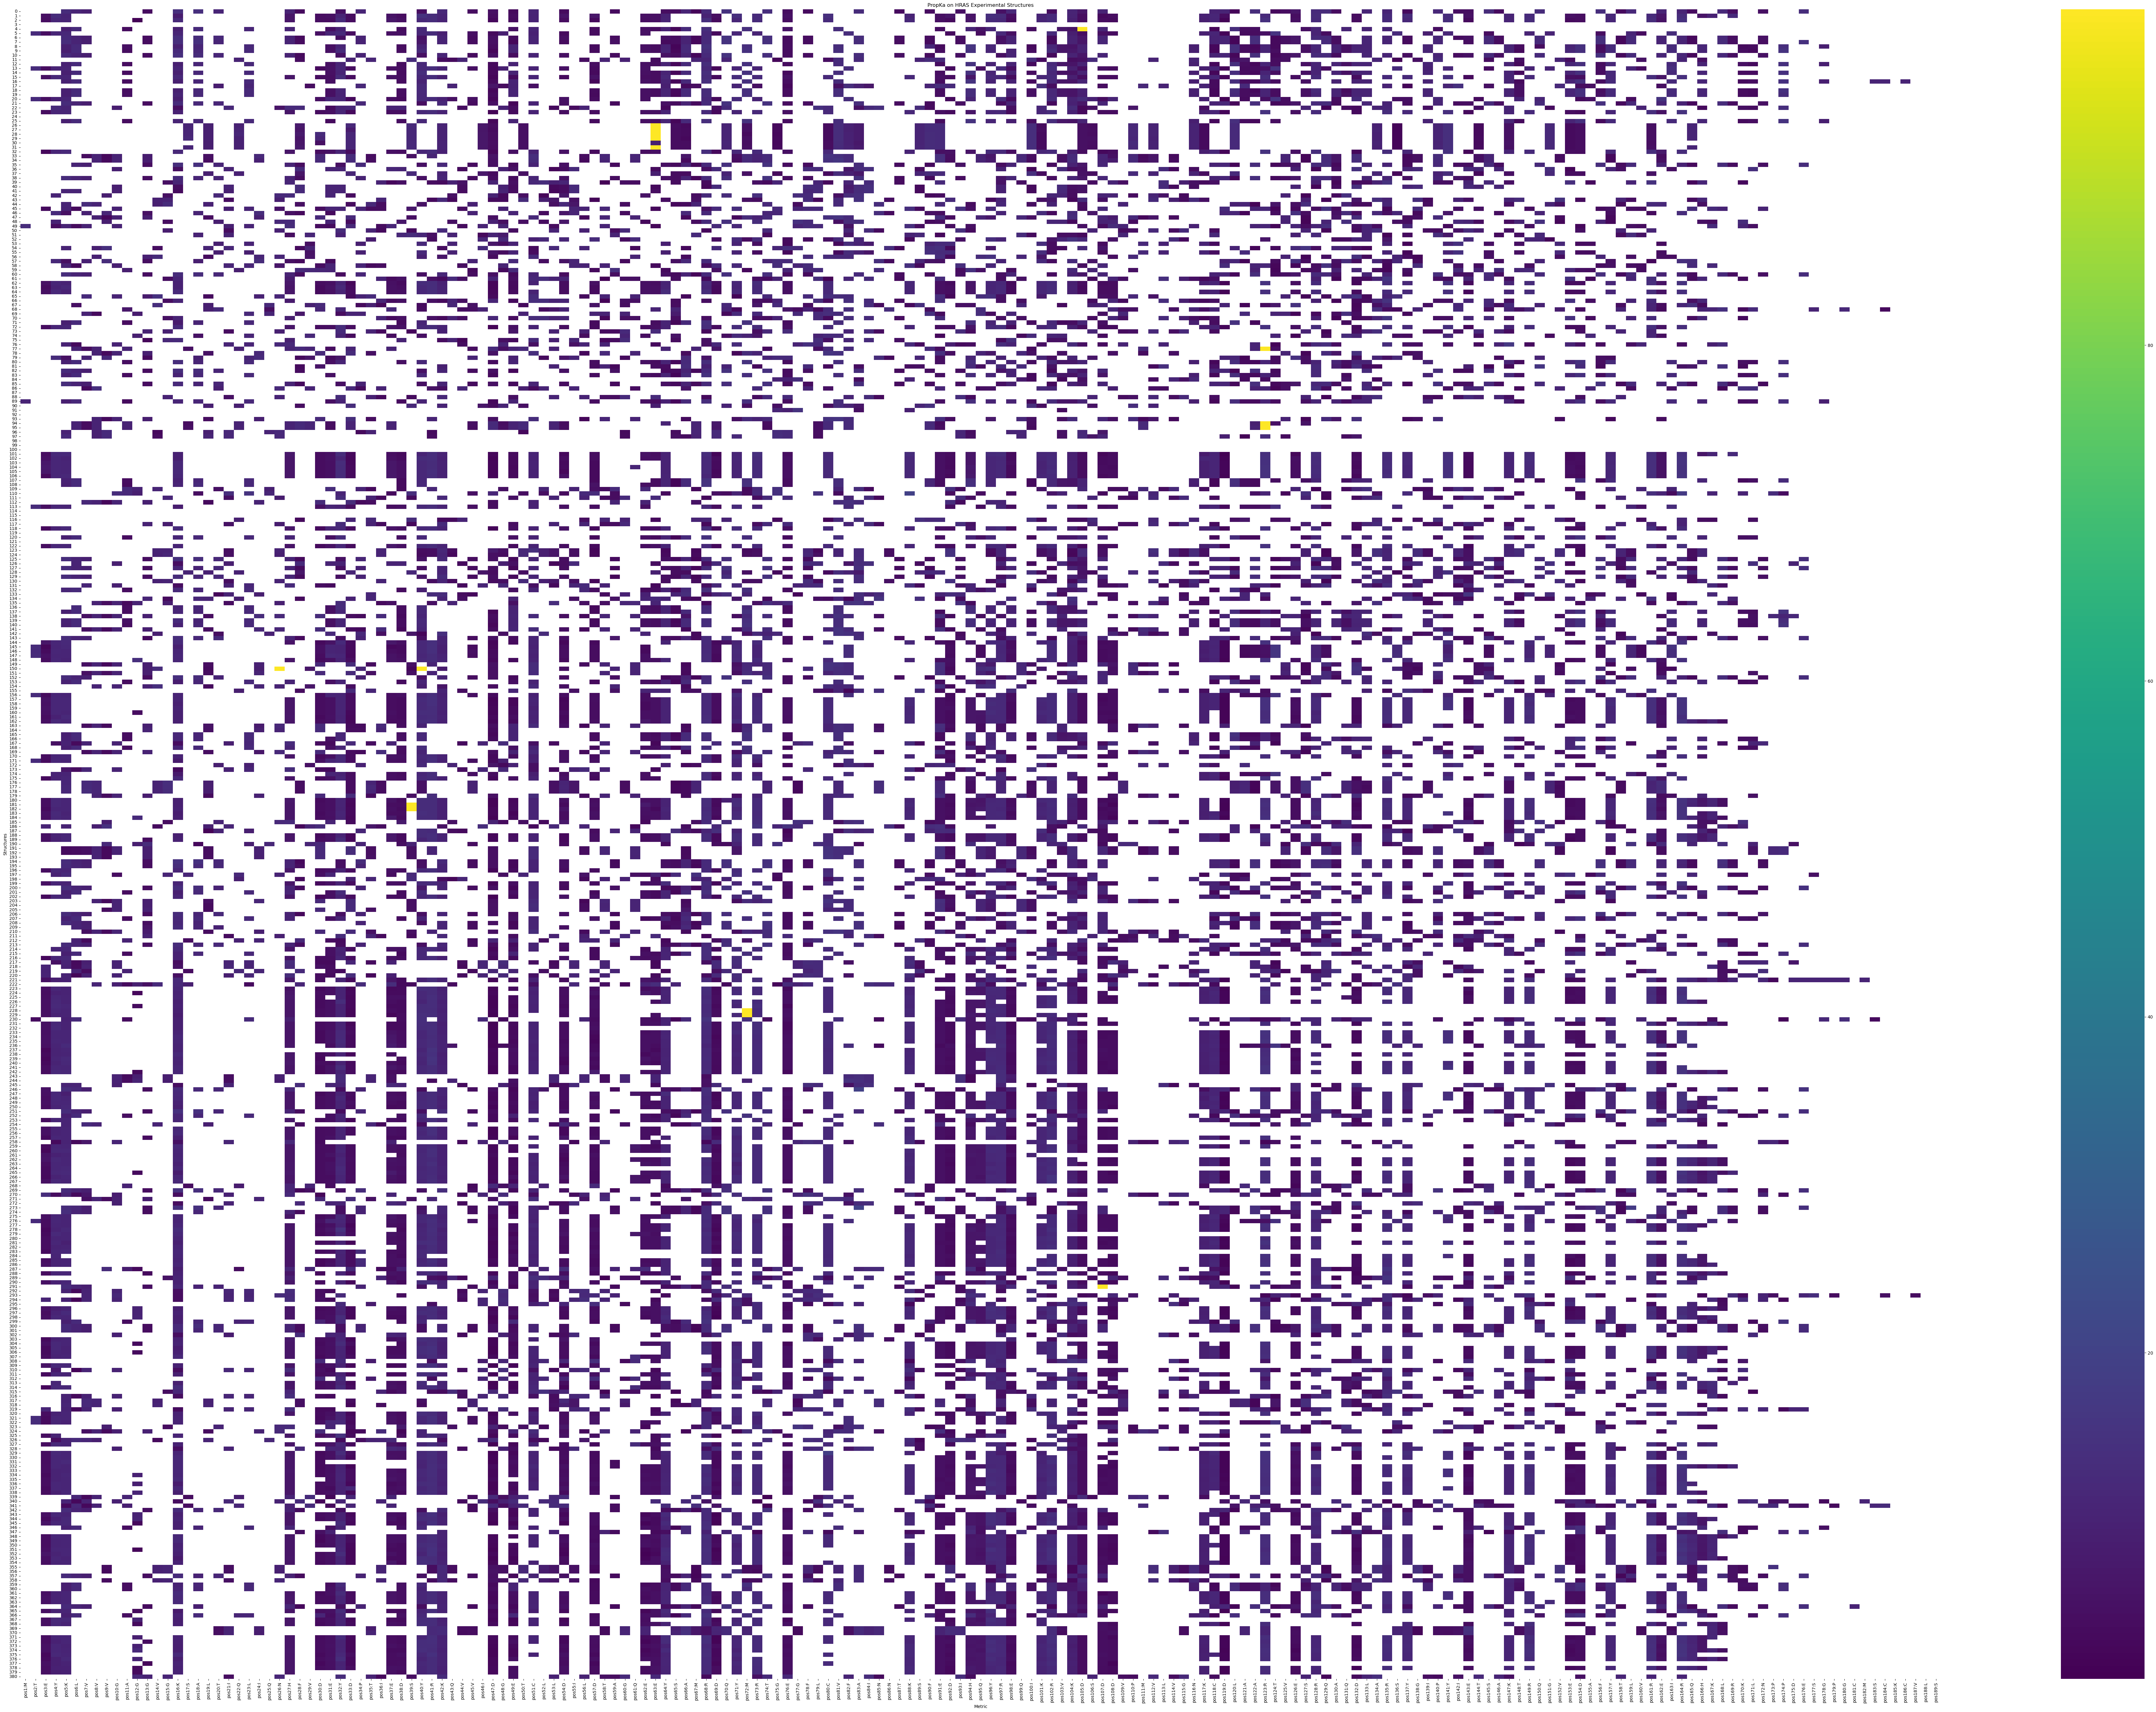

In [17]:
plt.figure(figsize=(100,70))
sns.heatmap(df.drop(columns=['Unnamed: 0']), cmap='viridis')
plt.title('PropKa on HRAS Experimental Structures')
plt.xlabel('Metric')
plt.ylabel('Structures')
plt.show

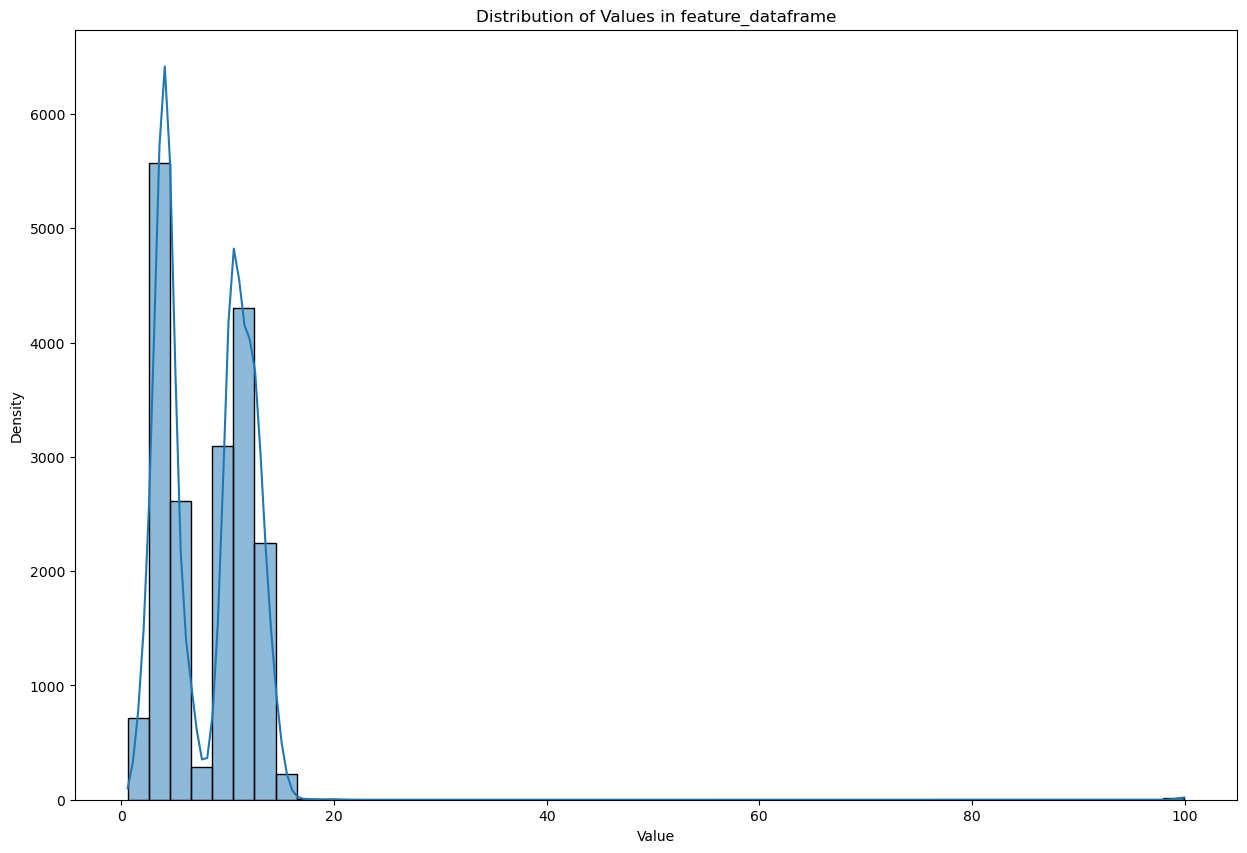

In [8]:
plt.figure(figsize=(15,10))
sns.histplot(df.drop(columns=['Unnamed: 0']).values.flatten(), bins=50, kde=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Values in feature_dataframe')
plt.show()

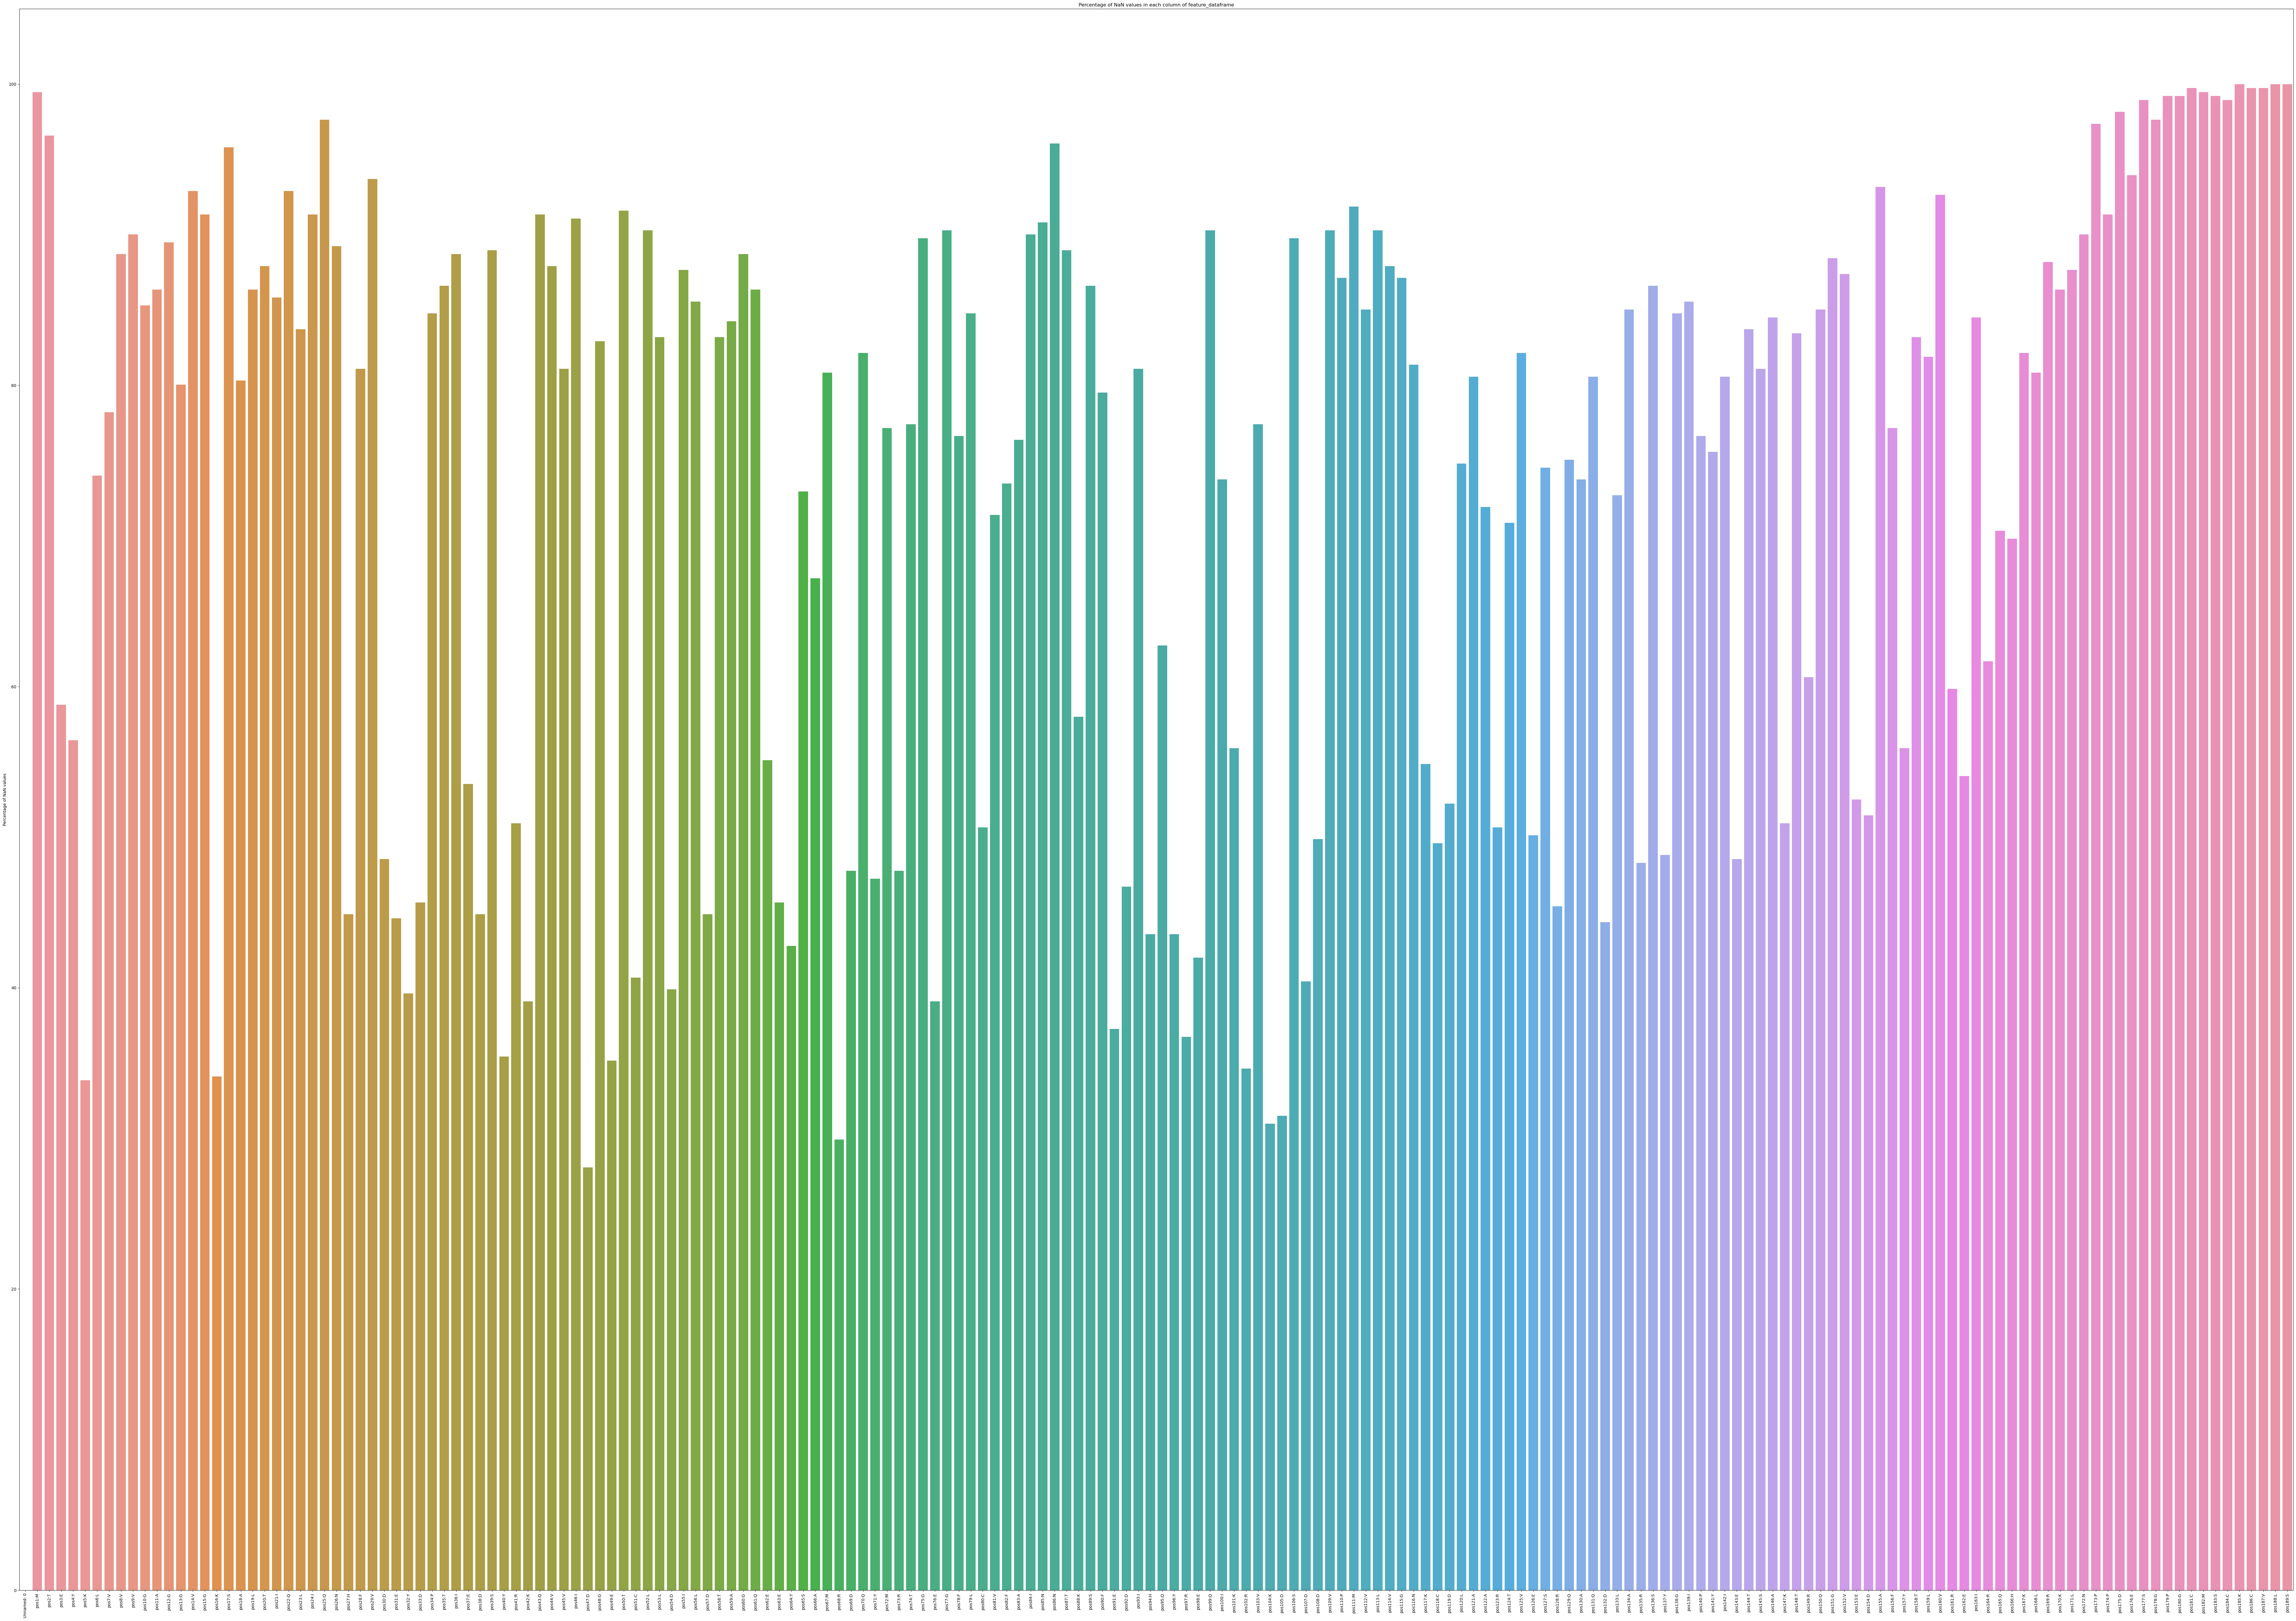

In [9]:
nan_percentage = df.isnull().mean() * 100

plt.figure(figsize=(100,70))
sns.barplot(x=nan_percentage.index, y=nan_percentage.values)
plt.xticks(rotation=90)
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values in each column of feature_dataframe')
plt.show()

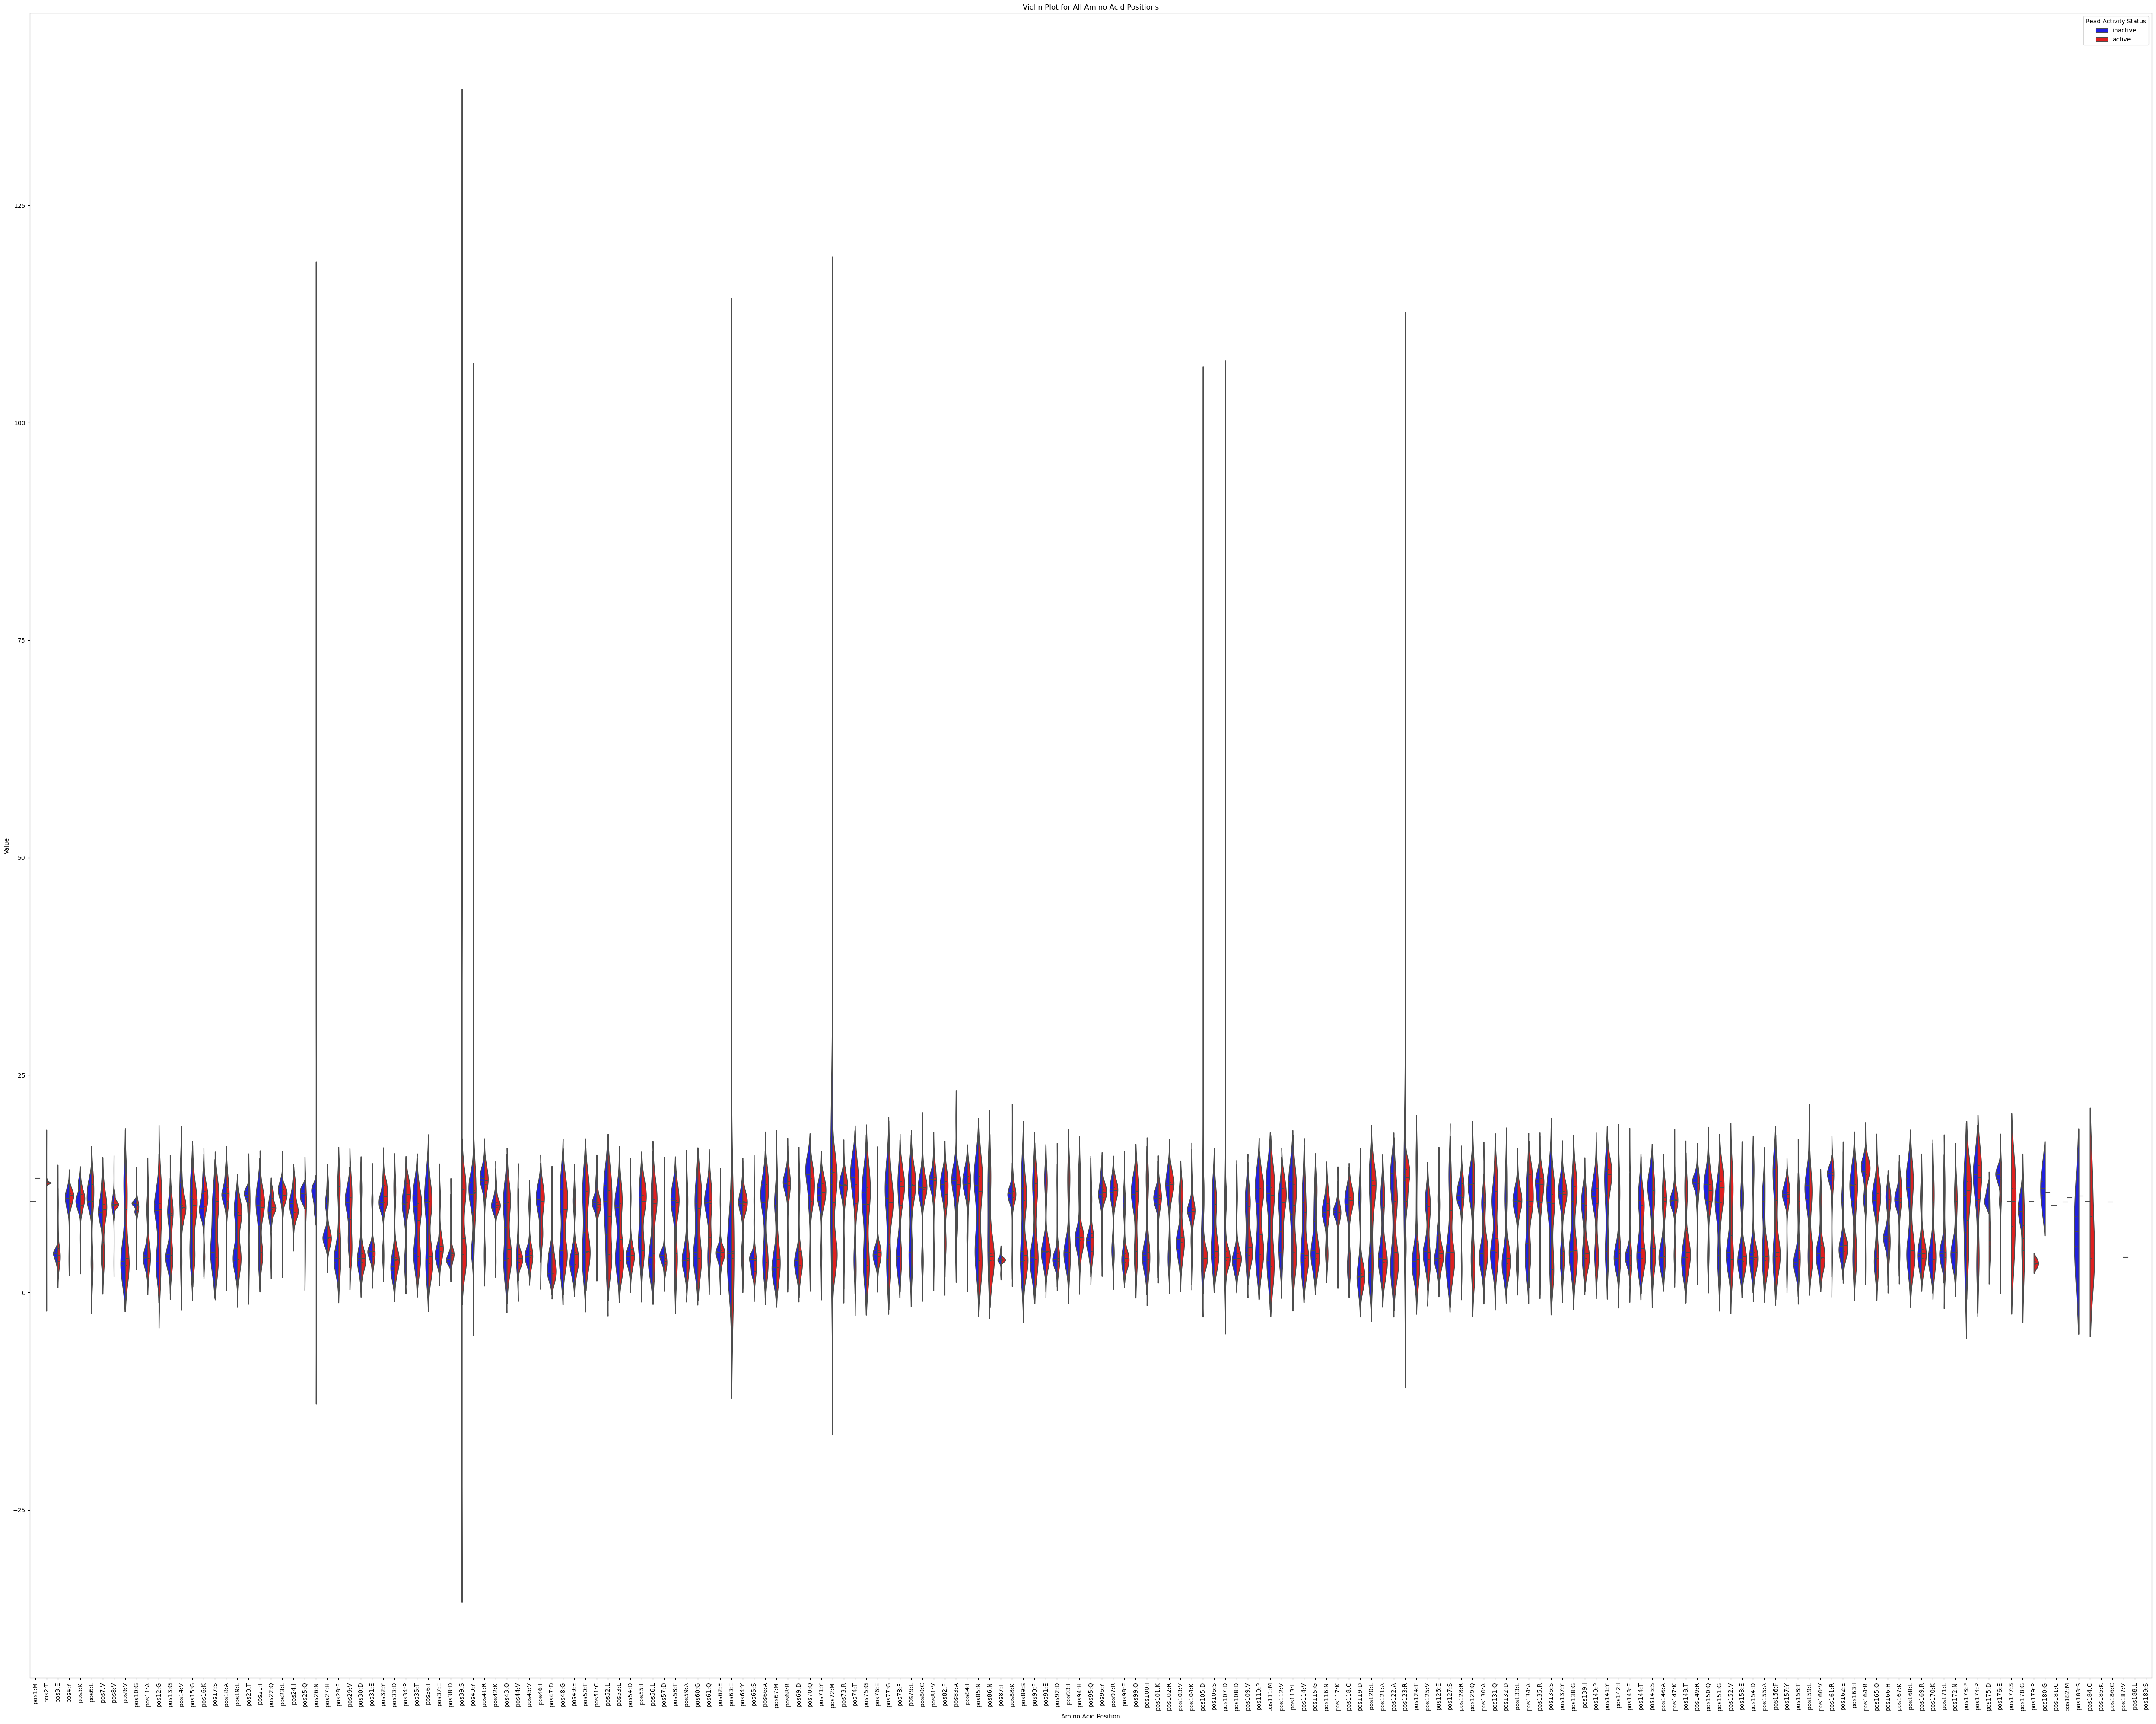

In [10]:
merged_nonnorm_df = pd.merge(df, metadata_df[['Unnamed: 0', 'Read Activity Status']], on='Unnamed: 0')

melted_nonnorm = pd.melt(merged_nonnorm_df, id_vars=['Unnamed: 0', 'Read Activity Status'], var_name='Amino Acid Position', value_name='Value')

plt.figure(figsize=(50,40))

sns.violinplot(x="Amino Acid Position", y="Value", hue="Read Activity Status", data=melted_nonnorm, split=True, inner="quart", palette={"active": "red", "inactive": "blue"})

plt.xticks(rotation=90)

plt.title('Violin Plot for All Amino Acid Positions')
plt.xlabel('Amino Acid Position')
plt.ylabel('Value')
plt.legend(title='Read Activity Status')

plt.tight_layout()

plt.show()

In [11]:
protein_codes = df['Unnamed: 0']

feature_df_numeric = df.drop(columns=['Unnamed: 0'])

scaler = StandardScaler()
feature_normalized = scaler.fit_transform(feature_df_numeric)

feature_normalized_df = pd.DataFrame(feature_normalized, columns=feature_df_numeric.columns)

feature_normalized_df.fillna(0, inplace=True)

C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


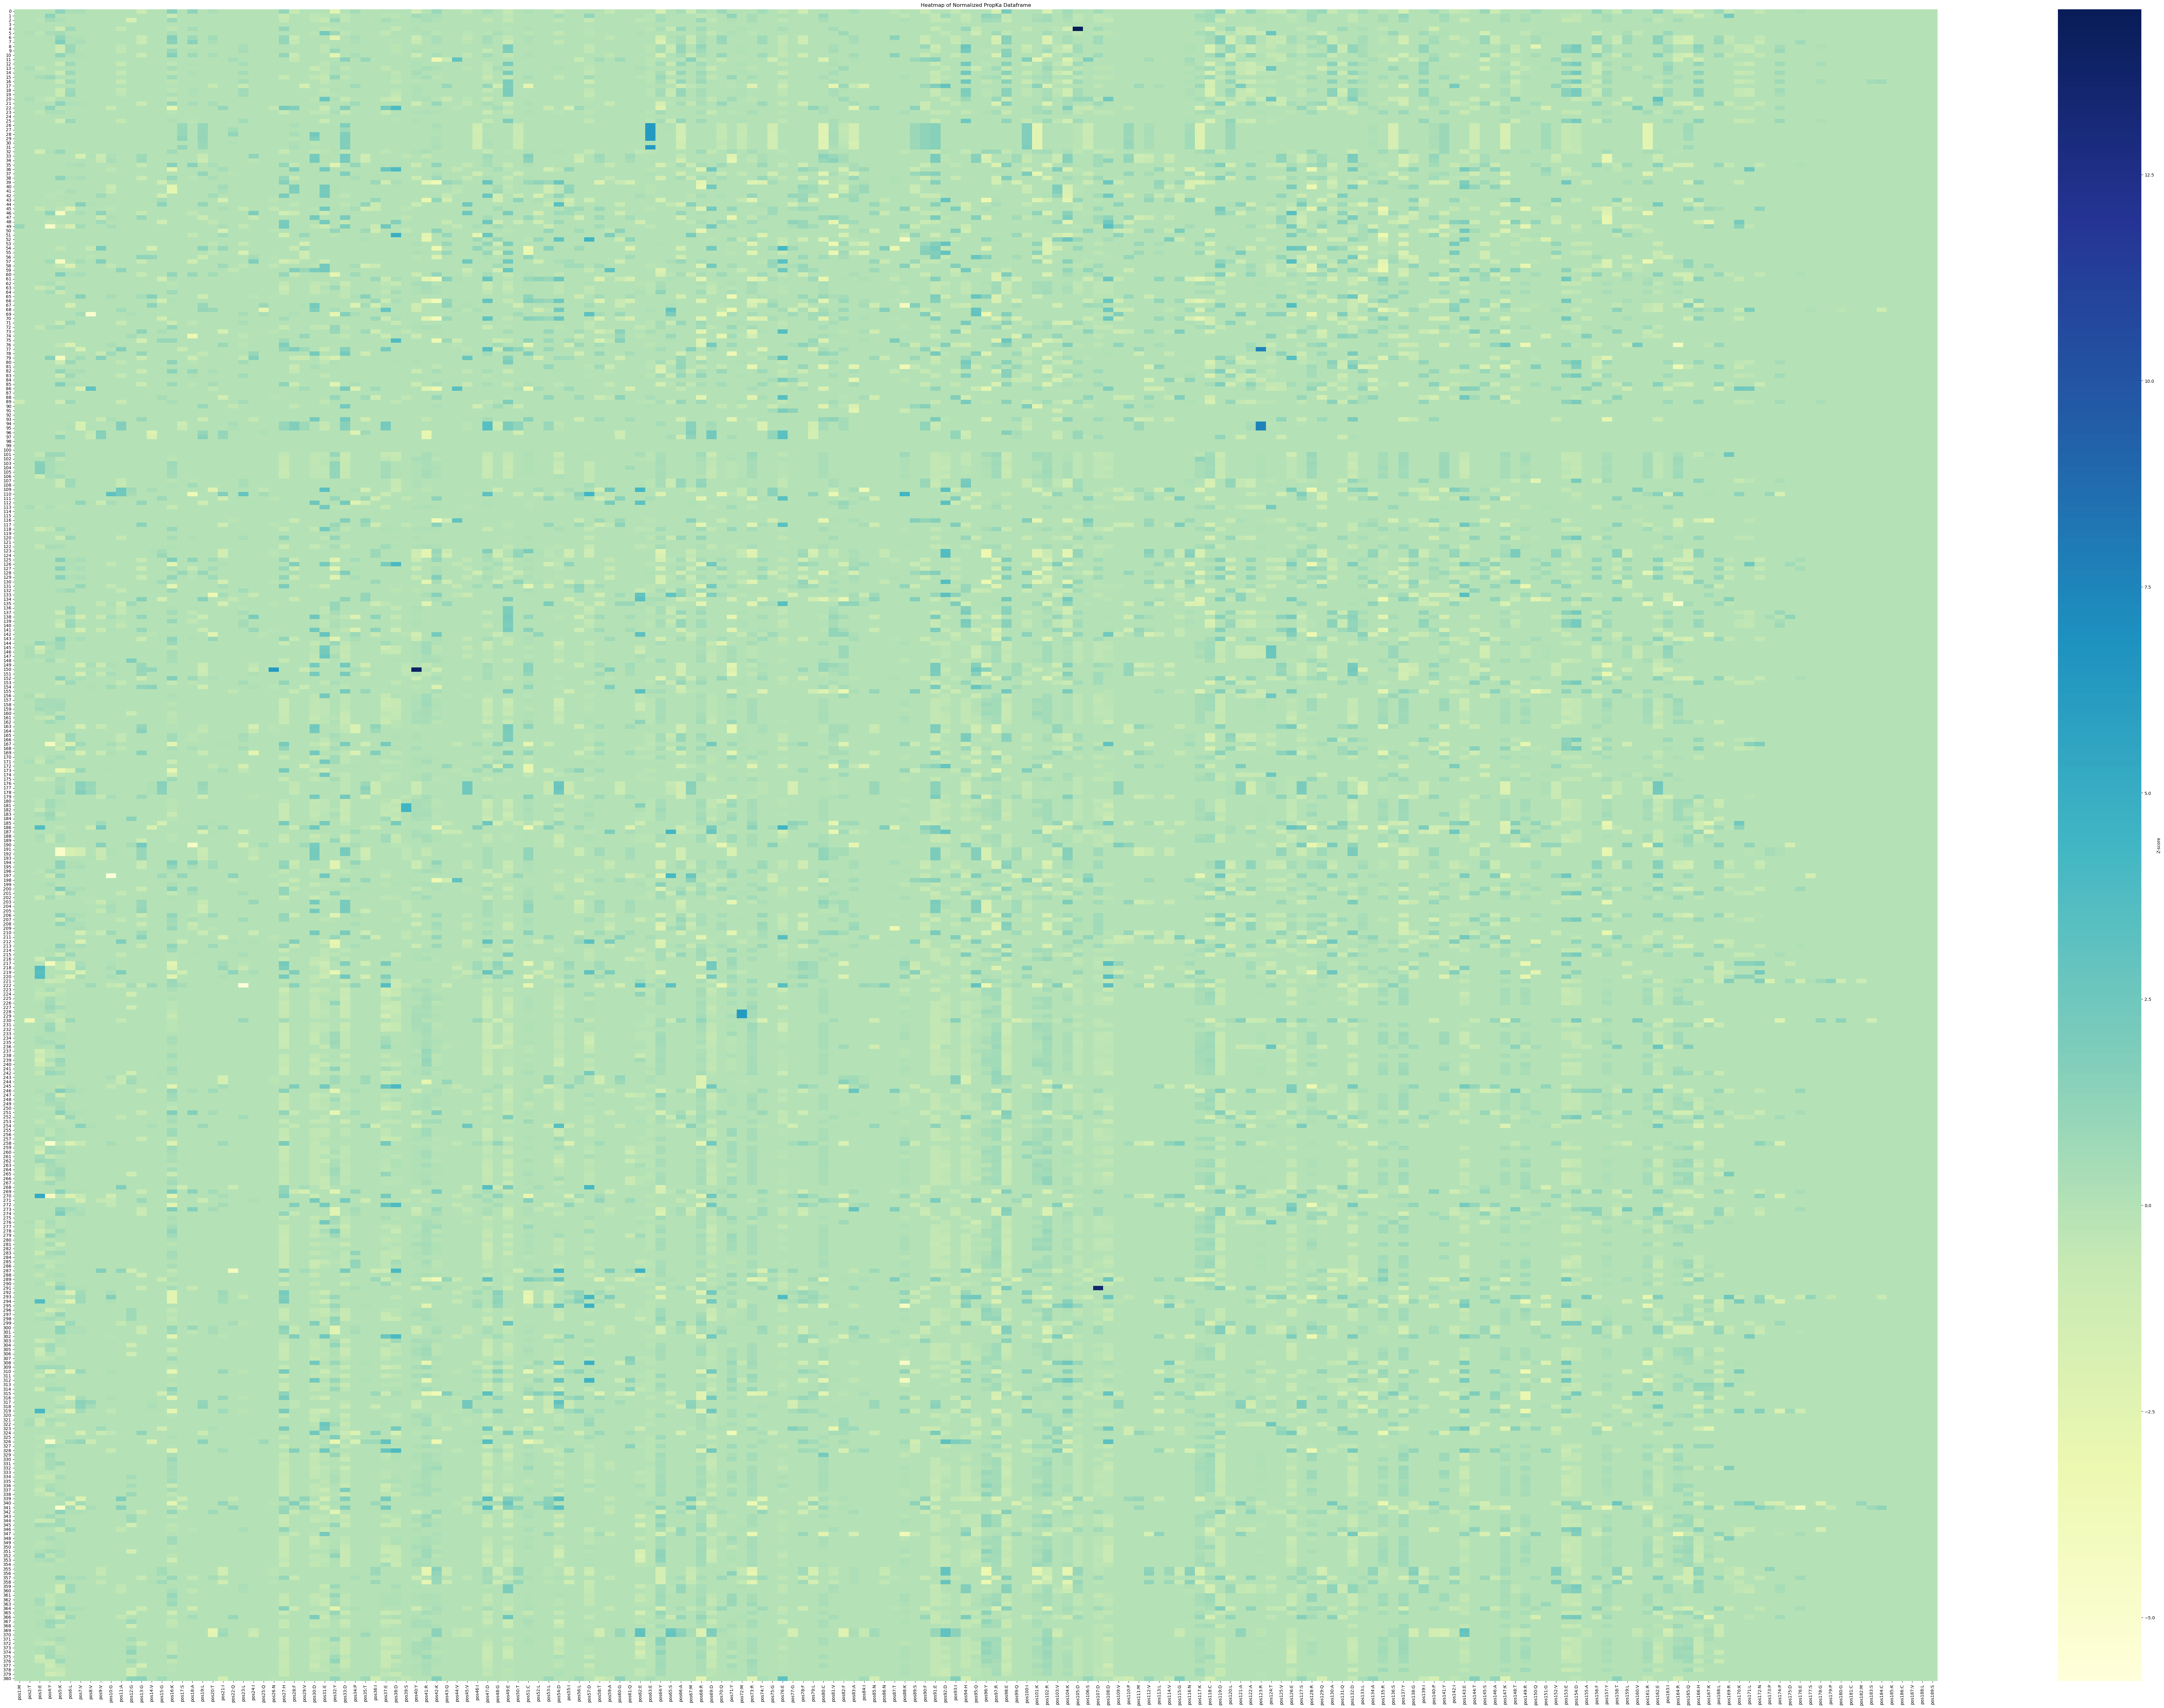

In [12]:
plt.figure(figsize=(100,70))
sns.heatmap(feature_normalized_df, cmap="YlGnBu", cbar_kws={'label': 'Z-score'})
plt.title('Heatmap of Normalized PropKa Dataframe')
plt.show()

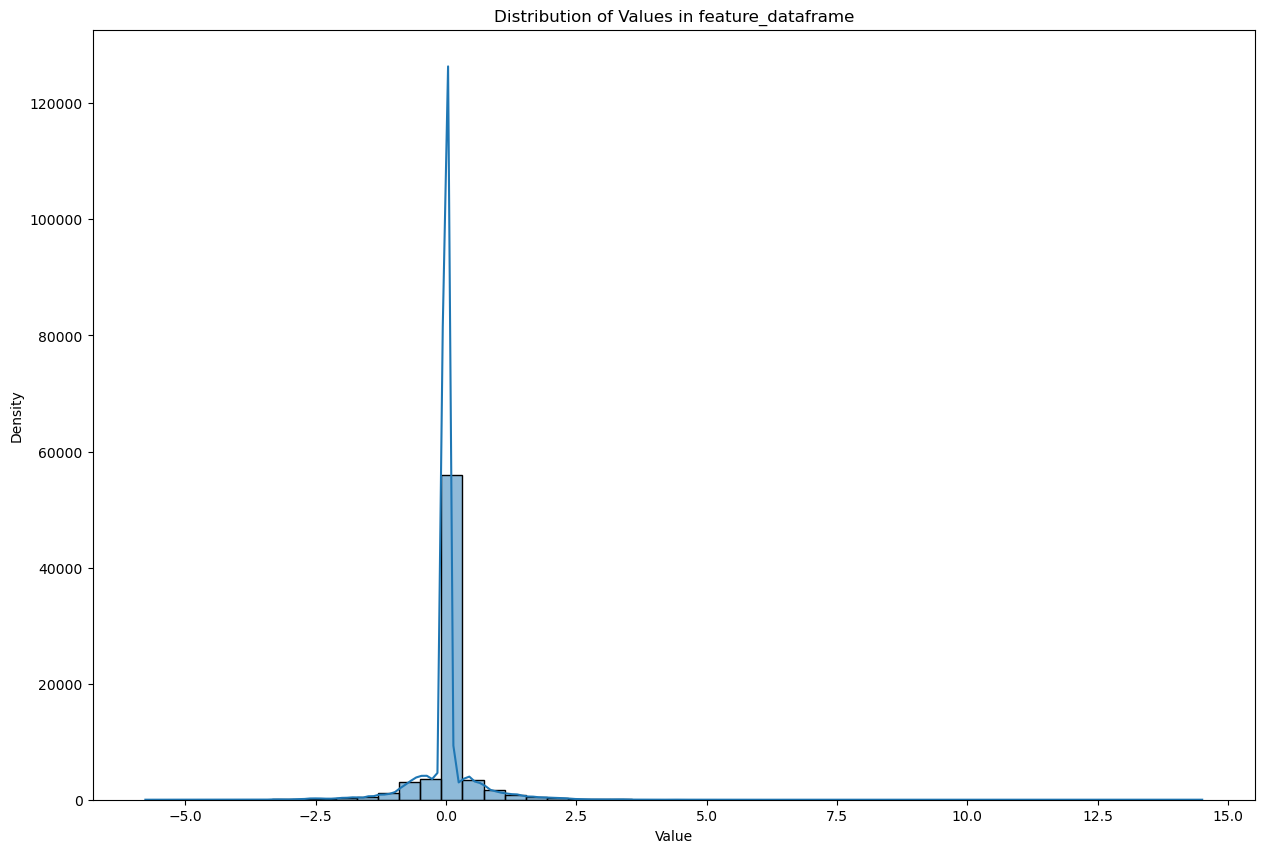

In [13]:
plt.figure(figsize=(15,10))
sns.histplot(feature_normalized_df.values.flatten(), bins=50, kde=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Values in feature_dataframe')
plt.show()

In [14]:
merged_df = pd.merge(feature_normalized_df, metadata_df, left_on=protein_codes, right_on="Unnamed: 0")

# Extracting the features (amino acid positions) and target (Read Activity Status)
X = feature_normalized_df
y = metadata_df["Read Activity Status"]
y_factorized = pd.factorize(y)[0]

# Display the first few rows of the merged dataframe
merged_df.head()

pos1:M  pos2:T    pos3:E    pos4:Y    pos5:K    pos6:L    pos7:V  pos8:V  \
0     0.0     0.0  0.000000  0.000000  1.307649  0.282281  0.356622     0.0   
1     0.0     0.0 -0.052086  1.327043 -0.056395  0.000000  0.000000     0.0   
2     0.0     0.0 -0.145580  0.487204  0.245979  0.000000  0.000000     0.0   
3     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.000000     0.0   
4     0.0     0.0  0.000000  0.000000 -1.077748  0.801688  0.000000     0.0   

   pos9:V  pos10:G  ...  Number of ILE  Number of GLN  Number of ASN  \
0     0.0      0.0  ...             10              5              6   
1     0.0      0.0  ...             11             11              4   
2     0.0      0.0  ...             11             11              4   
3     0.0      0.0  ...              8              6              5   
4     0.0      0.0  ...              8              6              5   

   Number of HIS  Number of PHE  Number of ASP  Number of PRO  Number of ARG  \
0            2.0              7             15           11.0             10   
1            3.0              5             14            3.0             12   
2            3.0              5             15            3.0             11   
3            2.0              8             11           12.0              5   
4            2.0              8             11           15.0              6   

   Number of CYS  Number of TRP  
0            5.0            2.0  
1            3.0            NaN  
2            3.0            NaN  
3            5.0            1.0  
4            6.0            1.0  

[5 rows x 231 columns]

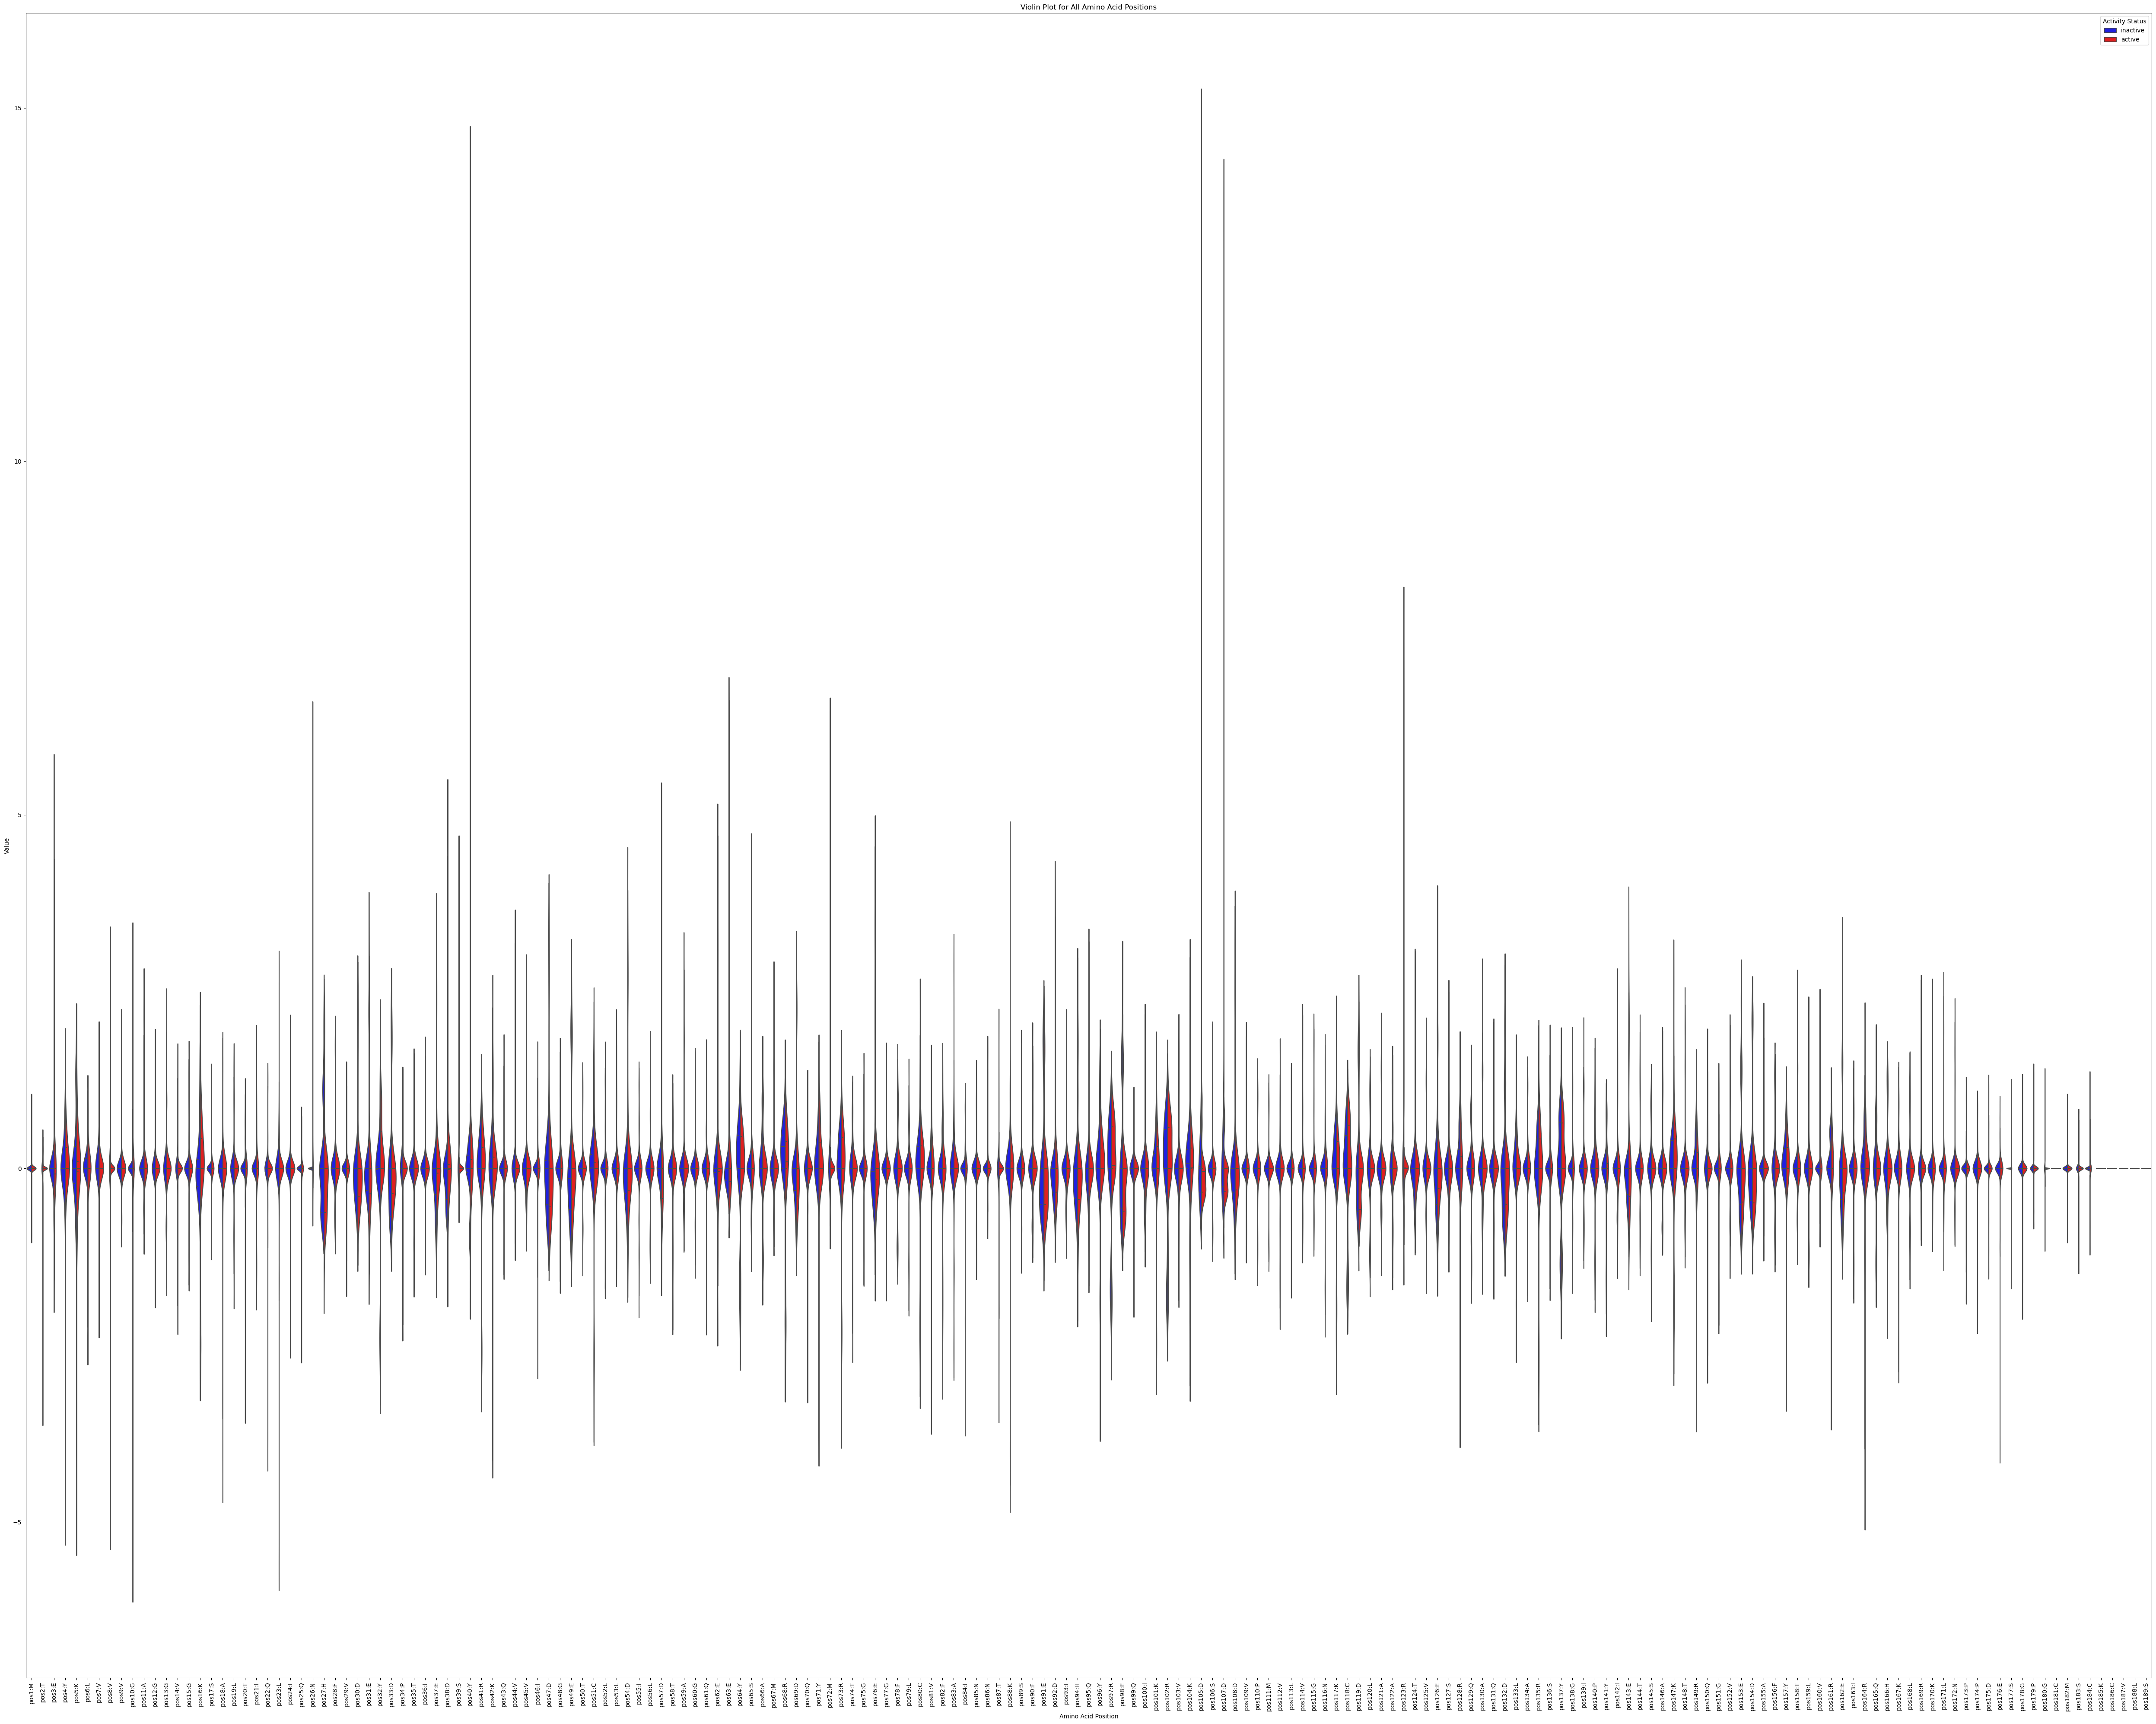

In [15]:
melted_data = pd.melt(X.iloc[:, :len(feature_normalized_df.columns)], value_vars=X.iloc[:, :len(feature_normalized_df.columns)].columns)
melted_data['Activity Status'] = np.tile(y, len(X.columns[:len(feature_normalized_df.columns)]))

plt.figure(figsize=(50,40))
sns.violinplot(x="variable", y="value", hue="Activity Status", data=melted_data, split=True, inner="quart", palette={"active": "red", "inactive": "blue"})
plt.xticks(rotation=90)
plt.title('Violin Plot for All Amino Acid Positions')
plt.xlabel('Amino Acid Position')
plt.ylabel('Value')
plt.legend(title='Activity Status')
plt.tight_layout()
plt.show()

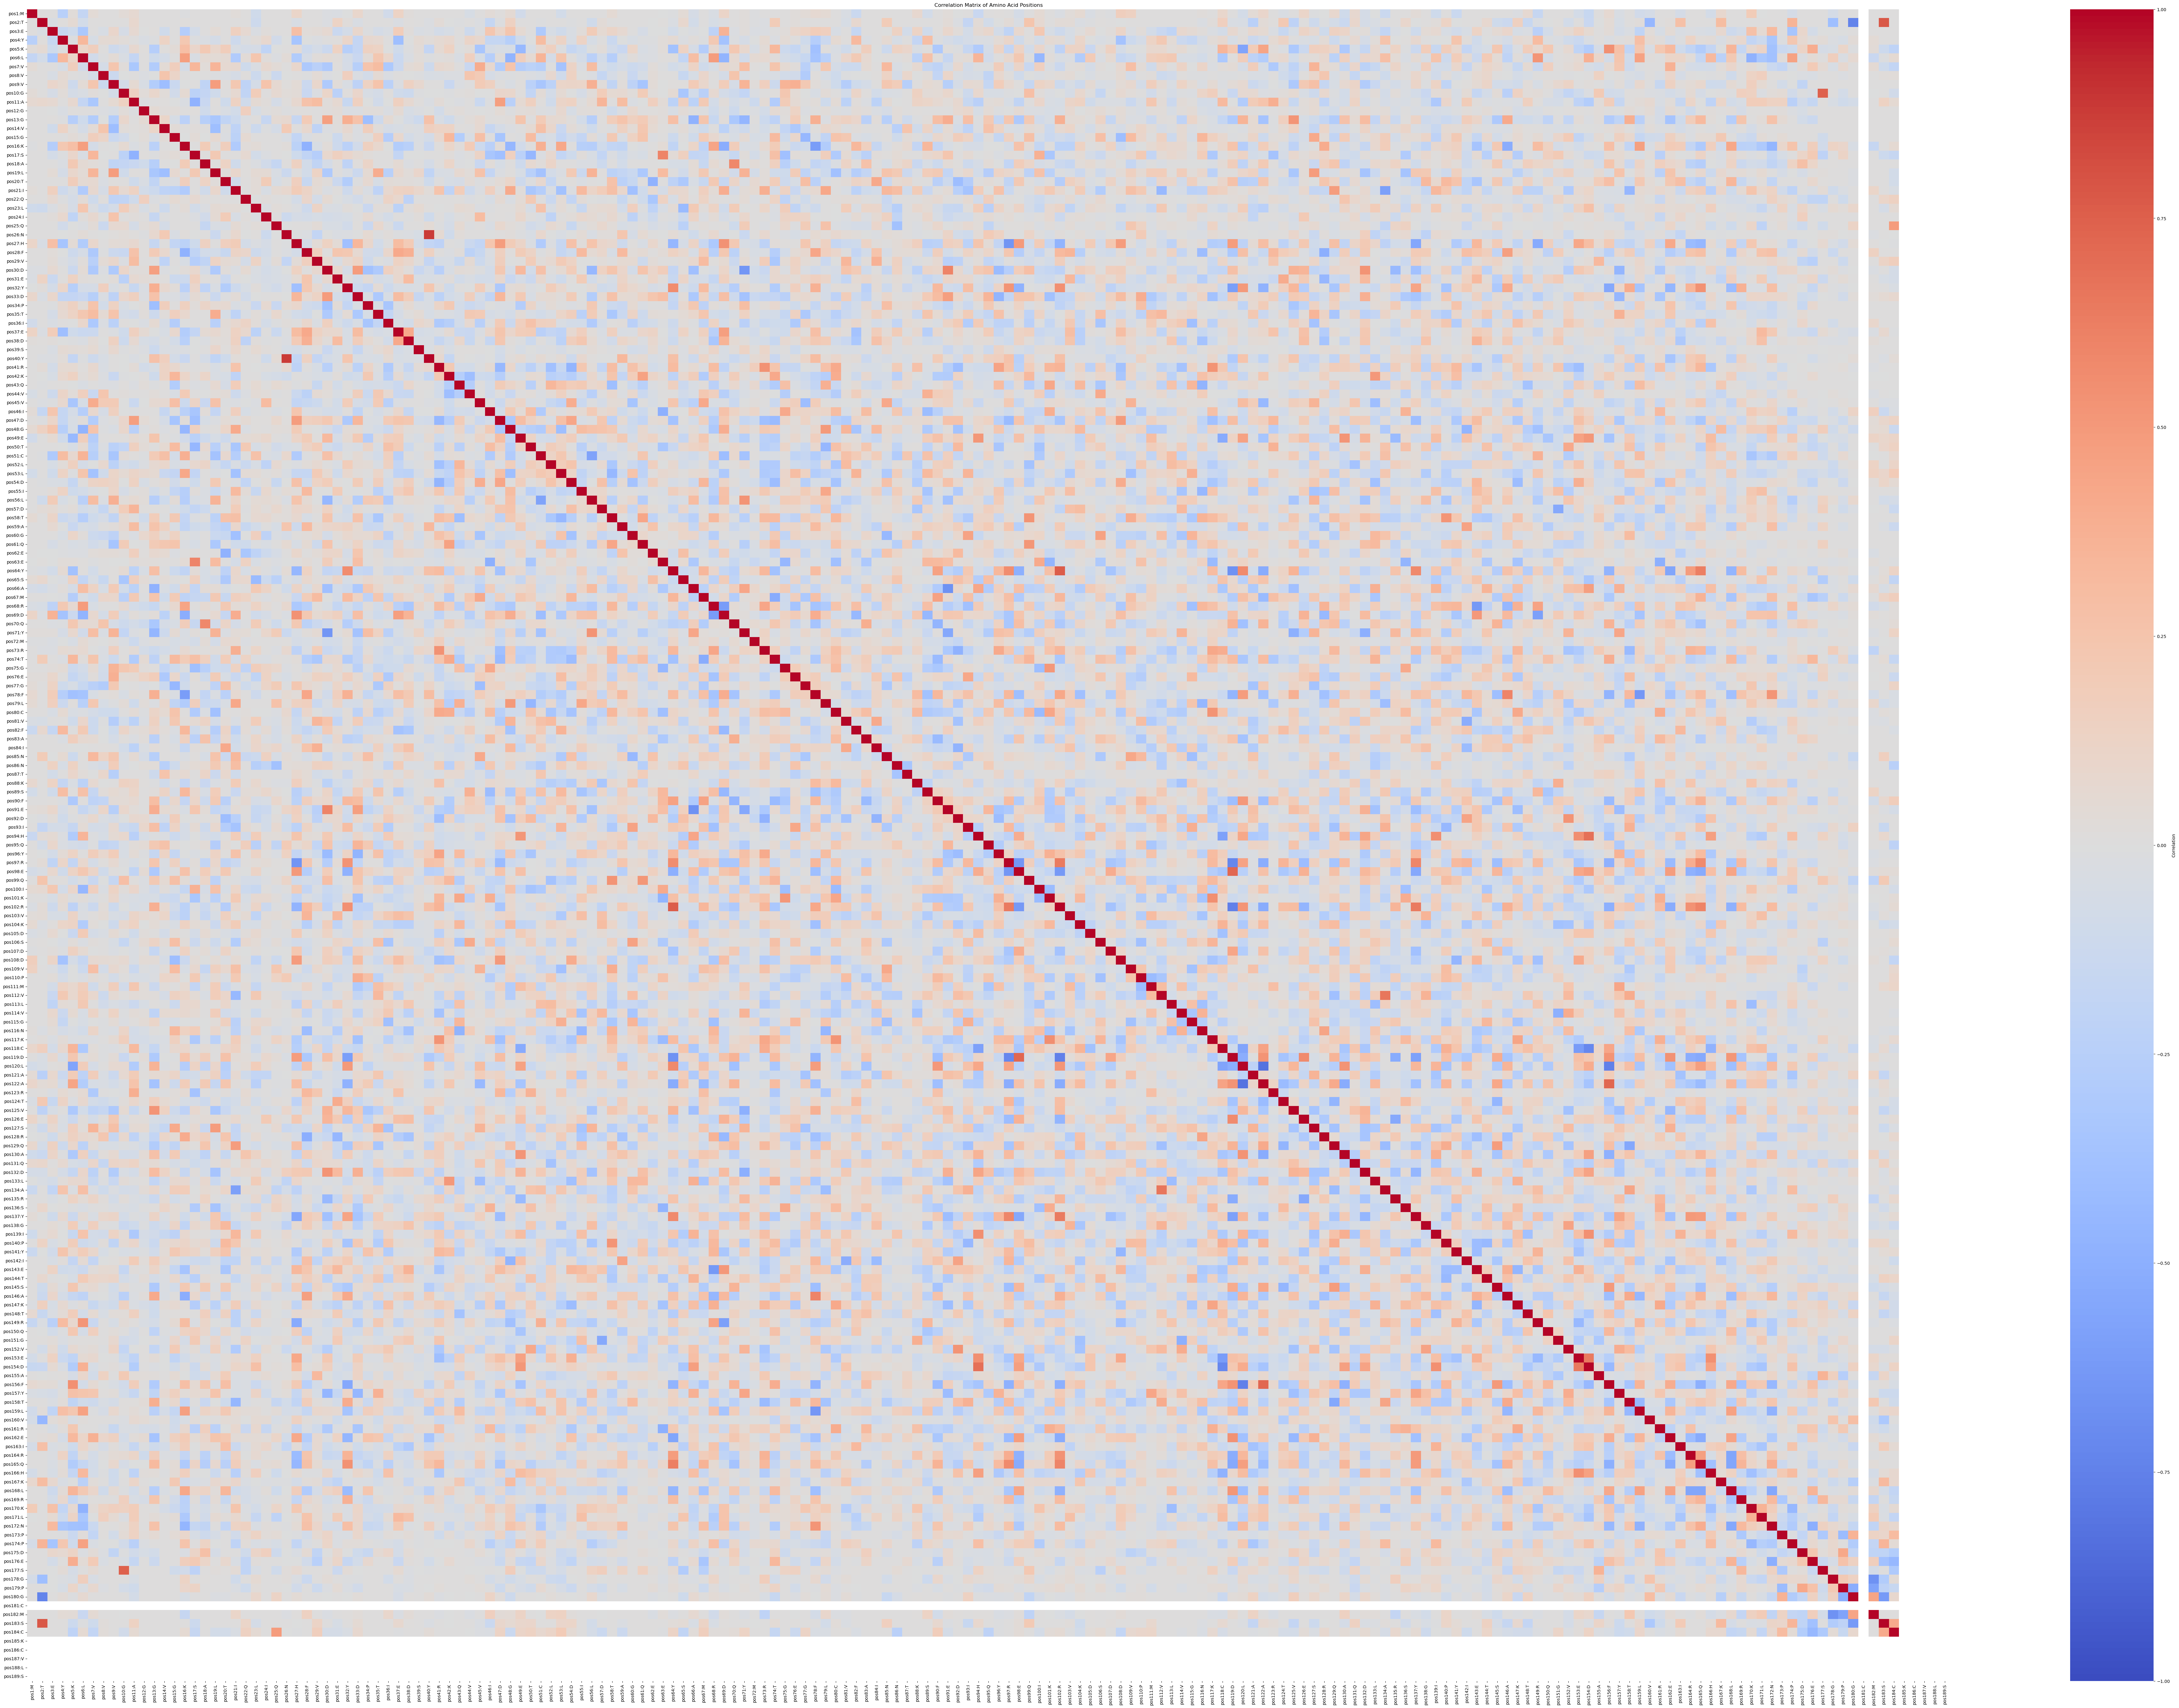

pos38:D     0.215987
pos32:Y     0.214296
pos68:R    -0.209890
pos78:F     0.183729
pos161:R   -0.169044
pos98:E    -0.164774
pos143:E    0.163340
pos20:T    -0.162217
pos158:T    0.161590
pos37:E     0.156582
dtype: float64

In [16]:
correlation_matrix = X.iloc[:, :len(feature_normalized_df.columns)].corr()

correlation_with_target = X.iloc[:, :len(feature_normalized_df.columns)].apply(lambda x: x.corr(pd.Series(y_factorized)))

plt.figure(figsize=(100, 70))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Amino Acid Positions')
plt.show()

correlation_with_target_abs = correlation_with_target.abs().sort_values(ascending=False)
correlation_with_target_sorted = correlation_with_target[correlation_with_target_abs.index]
correlation_with_target_sorted.head(10)

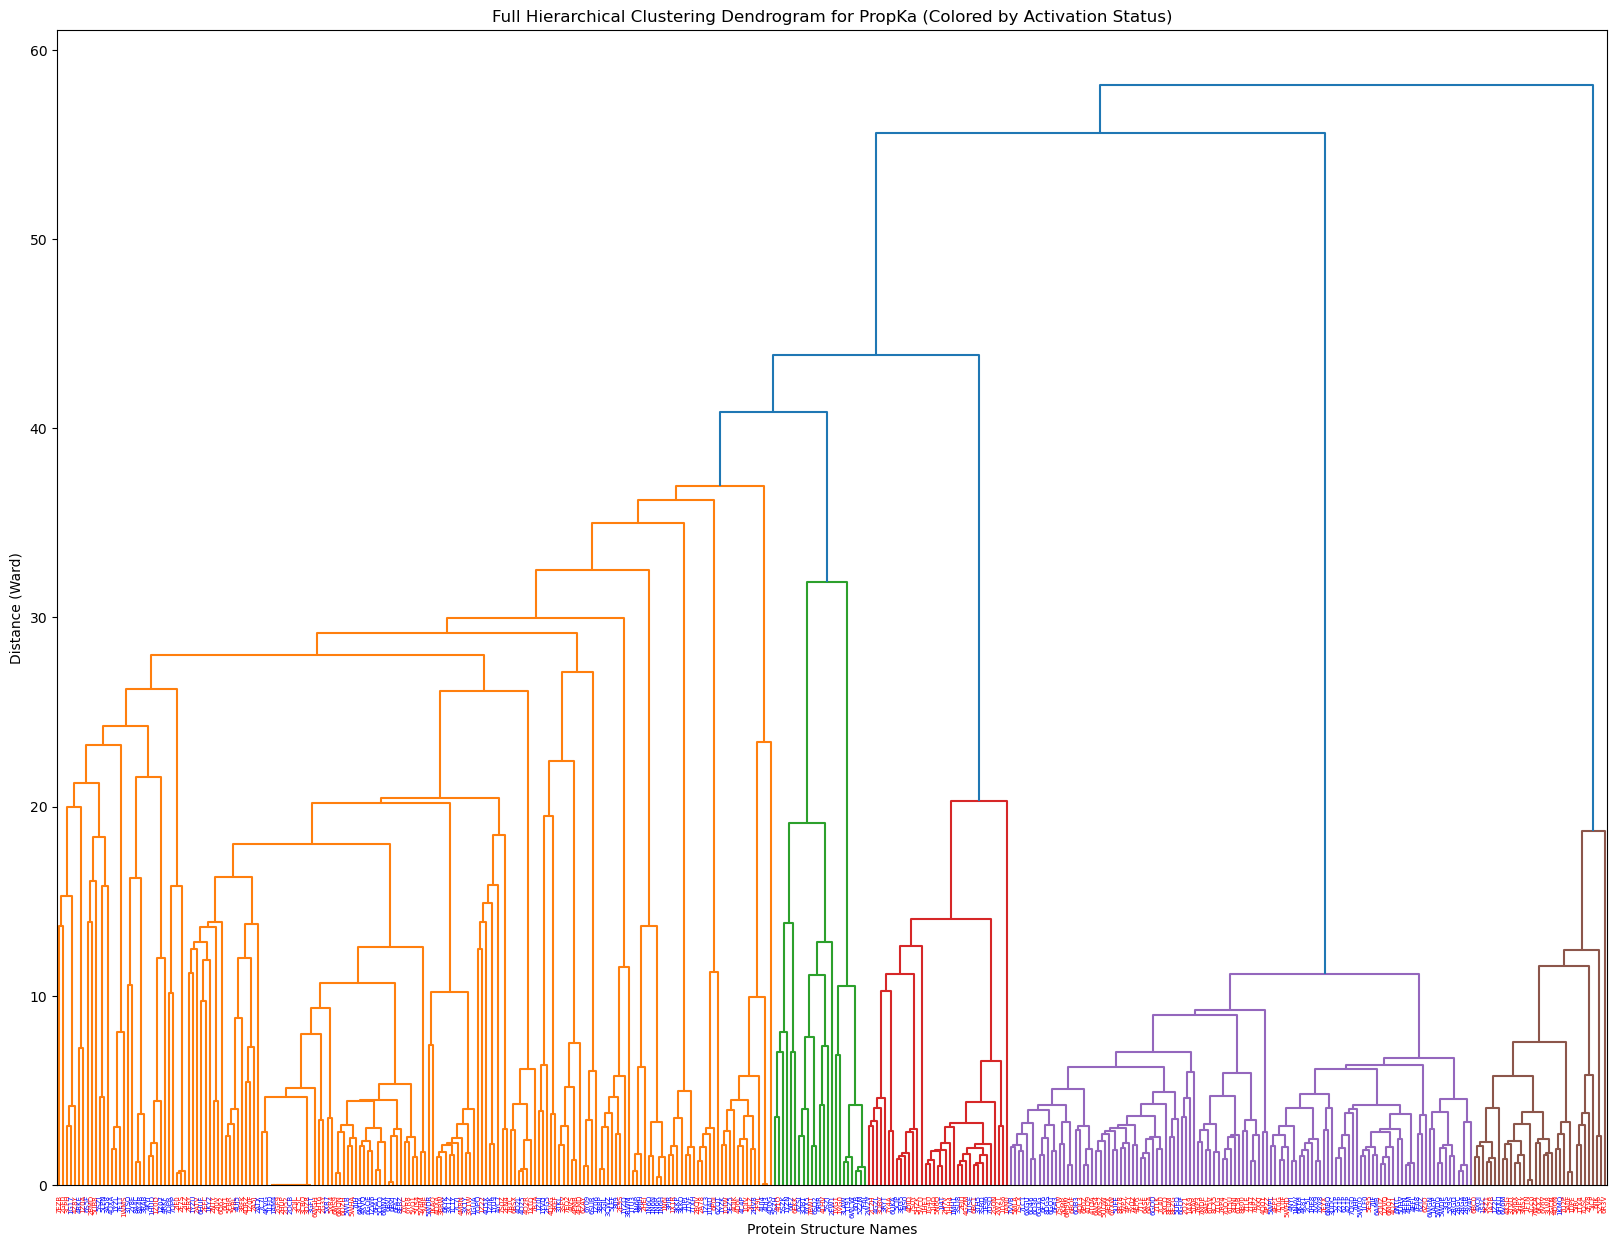

In [19]:
linked = linkage(feature_normalized, method='ward')

color_map = {
    "active": "blue",
    "inactive": "red"
}

labels = df["Unnamed: 0"].values

plt.figure(figsize=(20,15))
dendro_data = dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=labels)

ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    structure_id = lbl.get_text()
    color = color_map[merged_df[merged_df["Unnamed: 0"] == structure_id]["Read Activity Status"].values[0]]
    lbl.set_color(color)

plt.title('Full Hierarchical Clustering Dendrogram for PropKa (Colored by Activation Status)')
plt.xlabel('Protein Structure Names')
plt.ylabel('Distance (Ward)')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [17]:
merged_df = pd.merge(feature_normalized_df, metadata_df, left_on=protein_codes, right_on="Unnamed: 0")

X = feature_normalized_df
y = merged_df["Read Activity Status"]

merged_df.head()

pos1:M  pos2:T    pos3:E    pos4:Y    pos5:K    pos6:L    pos7:V  pos8:V  \
0     0.0     0.0  0.000000  0.000000  1.307649  0.282281  0.356622     0.0   
1     0.0     0.0 -0.052086  1.327043 -0.056395  0.000000  0.000000     0.0   
2     0.0     0.0 -0.145580  0.487204  0.245979  0.000000  0.000000     0.0   
3     0.0     0.0  0.000000  0.000000  0.000000  0.000000  0.000000     0.0   
4     0.0     0.0  0.000000  0.000000 -1.077748  0.801688  0.000000     0.0   

   pos9:V  pos10:G  ...  Number of ILE  Number of GLN  Number of ASN  \
0     0.0      0.0  ...             10              5              6   
1     0.0      0.0  ...             11             11              4   
2     0.0      0.0  ...             11             11              4   
3     0.0      0.0  ...              8              6              5   
4     0.0      0.0  ...              8              6              5   

   Number of HIS  Number of PHE  Number of ASP  Number of PRO  Number of ARG  \
0            2.0              7             15           11.0             10   
1            3.0              5             14            3.0             12   
2            3.0              5             15            3.0             11   
3            2.0              8             11           12.0              5   
4            2.0              8             11           15.0              6   

   Number of CYS  Number of TRP  
0            5.0            2.0  
1            3.0            NaN  
2            3.0            NaN  
3            5.0            1.0  
4            6.0            1.0  

[5 rows x 231 columns]

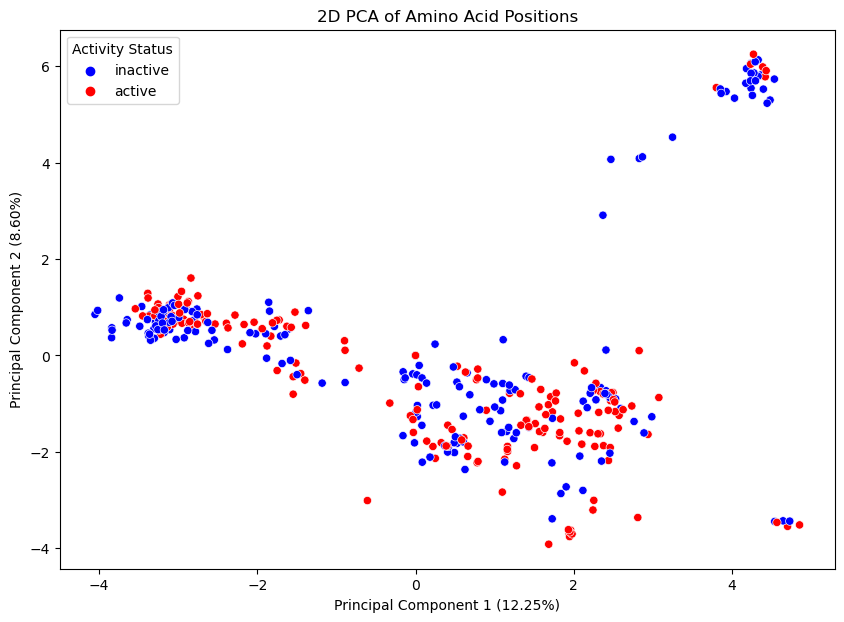

In [18]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.iloc[:, :len(feature_normalized_df.columns)])

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Activity Status'] = y

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Activity Status', data=pca_df, palette={"active": "red", "inactive": "blue"})

plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)')

plt.title('2D PCA of Amino Acid Positions')
plt.show()


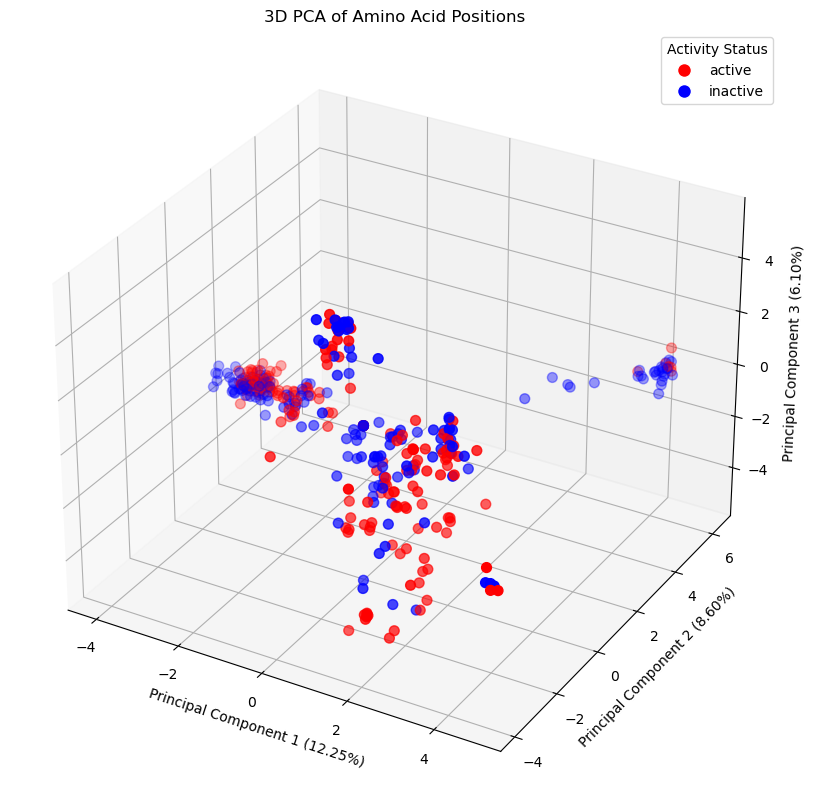

In [19]:
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(X)

pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df_3d['Activity Status'] = y

colors = {'active': 'red', 'inactive': 'blue'}

explained_variance_3d = pca_3d.explained_variance_ratio_

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_3d['Principal Component 1'], pca_df_3d['Principal Component 2'], pca_df_3d['Principal Component 3'], c=pca_df_3d["Activity Status"].map(colors), s=50, label=pca_df_3d["Activity Status"].unique())
ax.set_xlabel(f'Principal Component 1 ({explained_variance_3d[0]*100:.2f}%)')
ax.set_ylabel(f'Principal Component 2 ({explained_variance_3d[1]*100:.2f}%)')
ax.set_zlabel(f'Principal Component 3 ({explained_variance_3d[2]*100:.2f}%)')
ax.set_title('3D PCA of Amino Acid Positions')
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=status, markersize=10, markerfacecolor=colors[status]) for status in colors]
ax.legend(handles=legend_handles, title='Activity Status')

plt.show()

C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Lympha\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


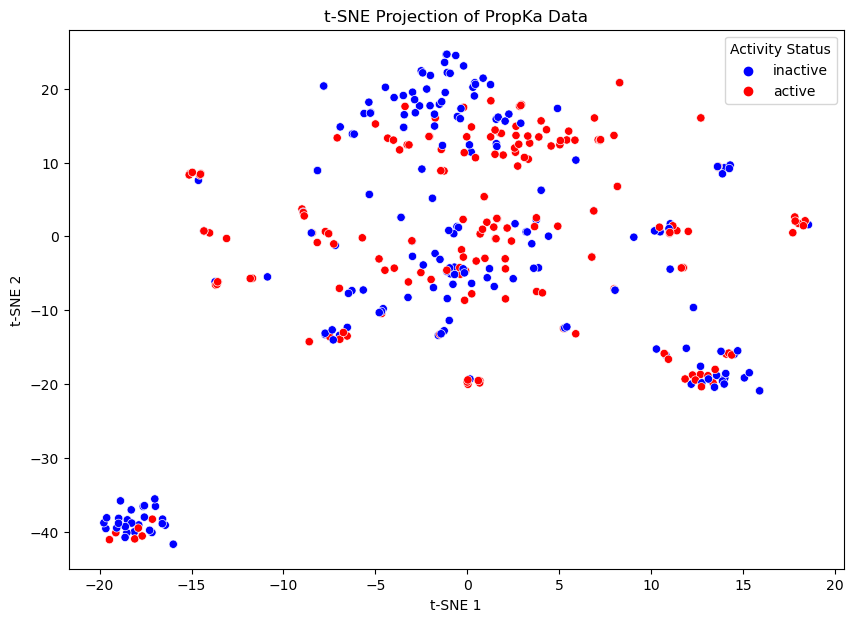

In [18]:
tsne = TSNE(n_components=2, random_state=1)
tsne_2d = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data=tsne_2d, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Activity Status'] = y

plt.figure(figsize=(10, 7))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Activity Status', data=tsne_df, palette={"active": "red", "inactive": "blue"})
plt.title('t-SNE Projection of PropKa Data')
plt.show()

In [21]:
label_encoder = LabelEncoder()
y_factorized = label_encoder.fit_transform(y)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X.iloc[:, :len(feature_normalized_df.columns)], y_factorized)

feature_importances = rf_clf.feature_importances_

importance_df = pd.DataFrame({
    'Amino Acid Position': X.columns[:len(feature_normalized_df.columns)],
    'Importance': feature_importances
})

sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_n = 15
selected_aminoacids = sorted_importance_df['Amino Acid Position'][:top_n]
sorted_importance_df

Amino Acid Position  Importance
56              pos57:D    0.044320
31              pos32:Y    0.035880
39              pos40:Y    0.029408
37              pos38:D    0.029001
15              pos16:K    0.026271
..                  ...         ...
181            pos182:M    0.000000
180            pos181:C    0.000000
179            pos180:G    0.000000
178            pos179:P    0.000000
188            pos189:S    0.000000

[189 rows x 2 columns]

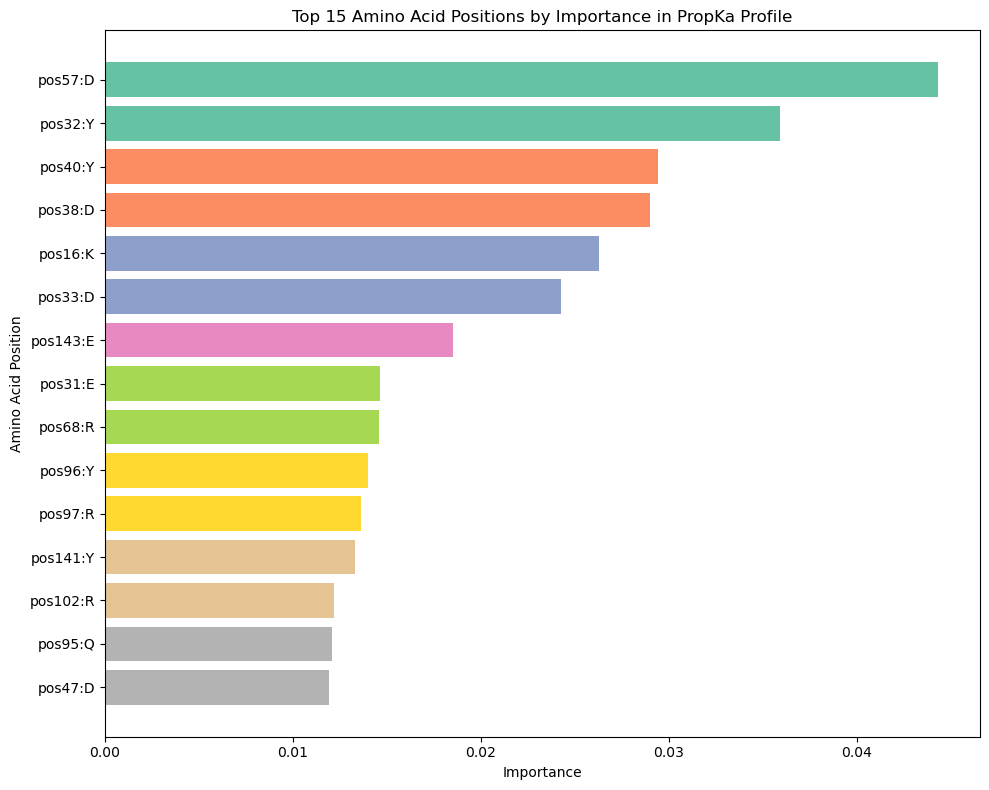

In [22]:
top_features = sorted_importance_df.head(top_n)

colors = cm.Set2(np.linspace(0, 1, top_n))

plt.figure(figsize=(10, 8))
bars = plt.barh(top_features['Amino Acid Position'], top_features['Importance'], color=colors)
plt.gca().invert_yaxis()  # to have the most important feature at the top
plt.title('Top {} Amino Acid Positions by Importance in PropKa Profile'.format(top_n))
plt.xlabel('Importance')
plt.ylabel('Amino Acid Position')
plt.tight_layout()
plt.show()

C:\Users\Lympha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lympha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lympha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

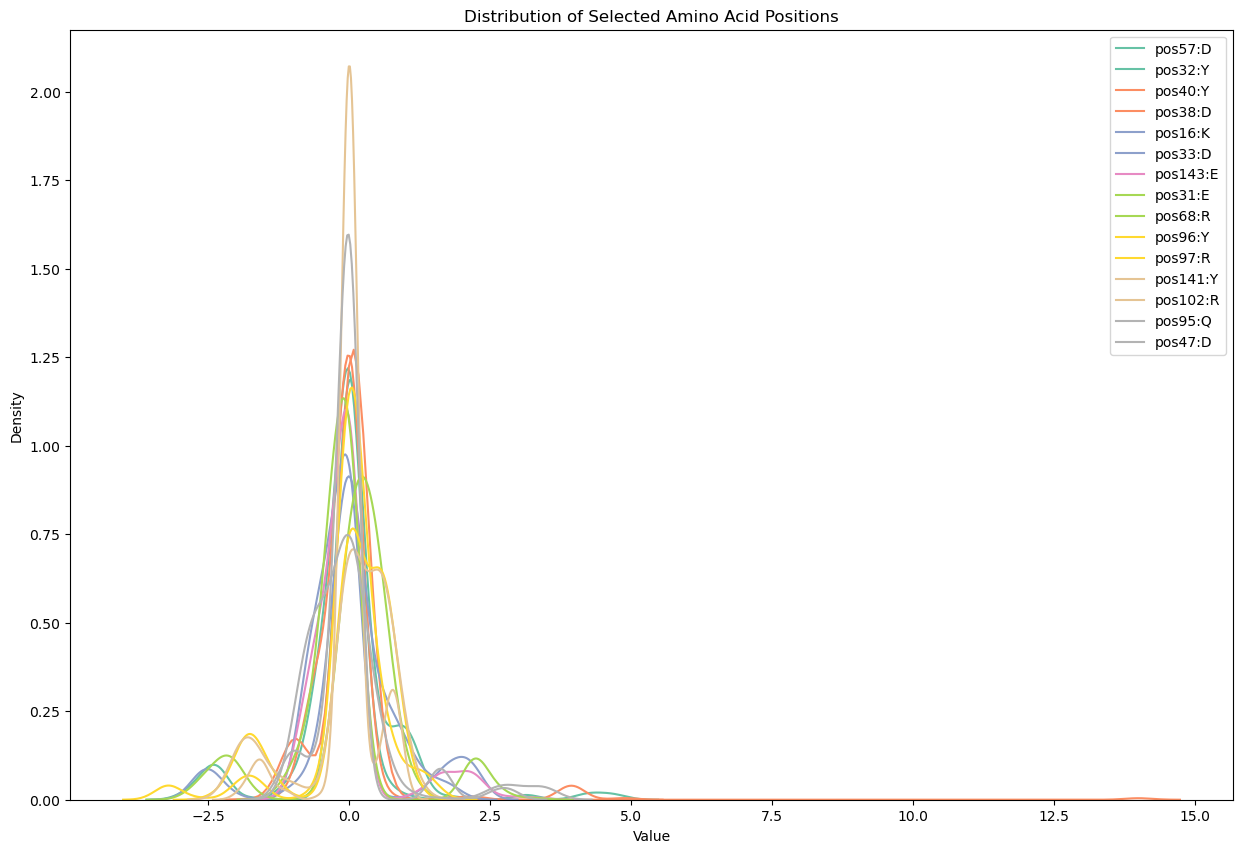

In [23]:
colors = cm.Set2(np.linspace(0, 1, len(selected_aminoacids)))

hex_colors = [to_hex(color) for color in colors]

color_dict = dict(zip(selected_aminoacids, hex_colors))

plt.figure(figsize=(15, 10))
for position in selected_aminoacids:
    sns.distplot(X[position], label=position, hist=False, color=color_dict[position])

plt.title('Distribution of Selected Amino Acid Positions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

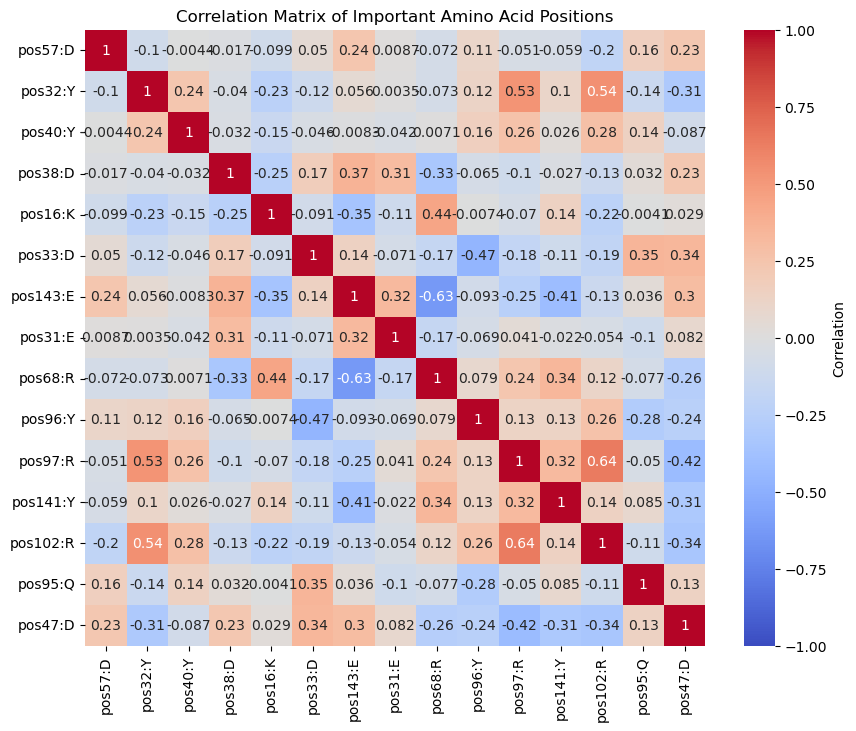

In [24]:
selected_correlation_matrix = correlation_matrix.loc[selected_aminoacids, selected_aminoacids]

plt.figure(figsize=(10, 8))
sns.heatmap(selected_correlation_matrix, cmap="coolwarm", annot=True, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Important Amino Acid Positions')
plt.show()

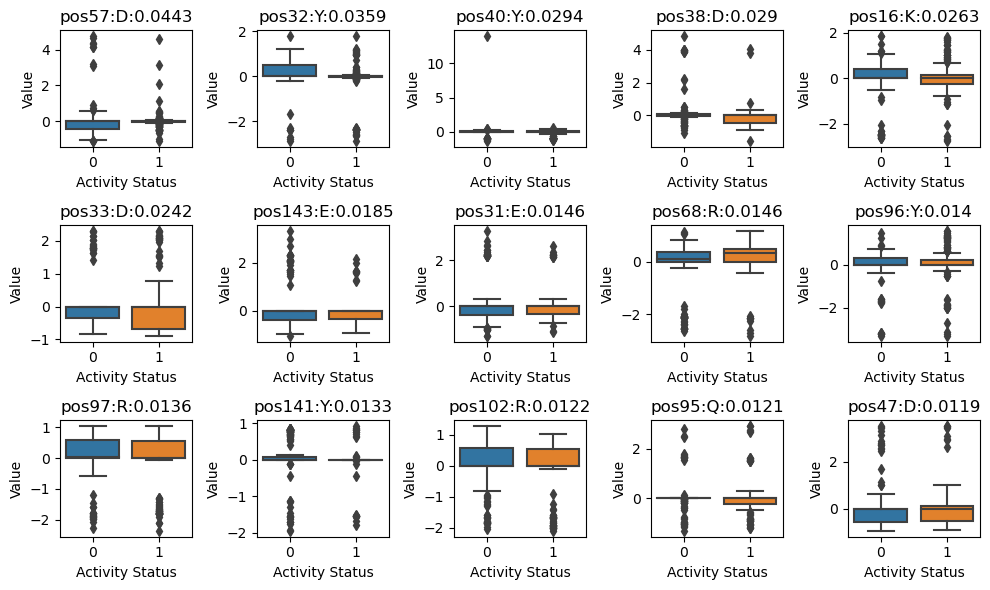

In [25]:
plt.figure(figsize=(10, 6))
for idx, position in enumerate(selected_aminoacids):
    plt.subplot(3, 5, idx+1)
    sns.boxplot(x=y_factorized, y=X[position])
    plt.title(f'{position}:{round(sorted_importance_df.iloc[idx, sorted_importance_df.columns.get_loc("Importance")], 4)}')
    plt.xlabel('Activity Status')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

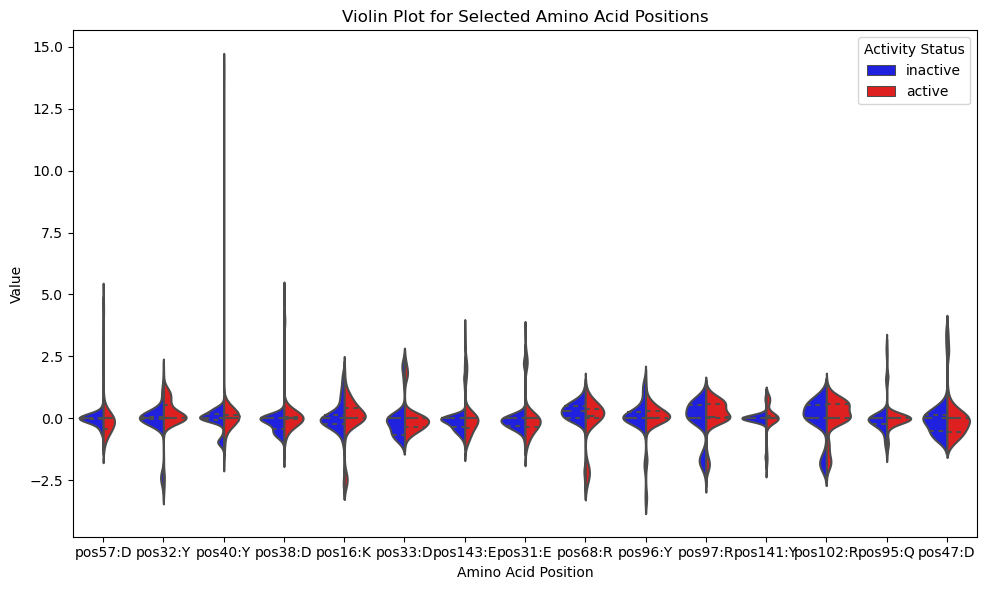

In [26]:
melted_data_selected = pd.melt(X[selected_aminoacids], value_vars=selected_aminoacids)
melted_data_selected['Activity Status'] = np.tile(y, len(selected_aminoacids))

plt.figure(figsize=(10, 6))
sns.violinplot(x="variable", y="value", hue="Activity Status", data=melted_data_selected, split=True, inner="quart", palette={"active": "red", "inactive": "blue"})
plt.title('Violin Plot for Selected Amino Acid Positions')
plt.xlabel('Amino Acid Position')
plt.ylabel('Value')
plt.legend(title='Activity Status')
plt.tight_layout()
plt.show()

In [27]:
active_data = X[y == "active"][selected_aminoacids]
inactive_data = X[y == "inactive"][selected_aminoacids]

t_stats = []
p_values = []

for position in selected_aminoacids:
    t_stat, p_value = ttest_ind(active_data[position], inactive_data[position])
    t_stats.append(t_stat)
    p_values.append(p_value)

t_test_results = pd.DataFrame({
    'Amino Acid Position': selected_aminoacids,
    'T-Statistic': t_stats,
    'P-Value': p_values
})

t_test_results

Amino Acid Position  T-Statistic   P-Value
56              pos57:D    -0.403150  0.687065
31              pos32:Y     4.271116  0.000025
39              pos40:Y     1.777134  0.076348
37              pos38:D     4.306457  0.000021
15              pos16:K    -0.383321  0.701697
32              pos33:D     1.010831  0.312742
142            pos143:E     3.223176  0.001378
30              pos31:E     1.058318  0.290585
67              pos68:R    -4.179209  0.000036
95              pos96:Y    -0.756416  0.449869
96              pos97:R     2.623448  0.009056
140            pos141:Y     1.419844  0.156475
101            pos102:R     1.464024  0.144016
94              pos95:Q     0.810573  0.418120
46              pos47:D     0.709248  0.478607

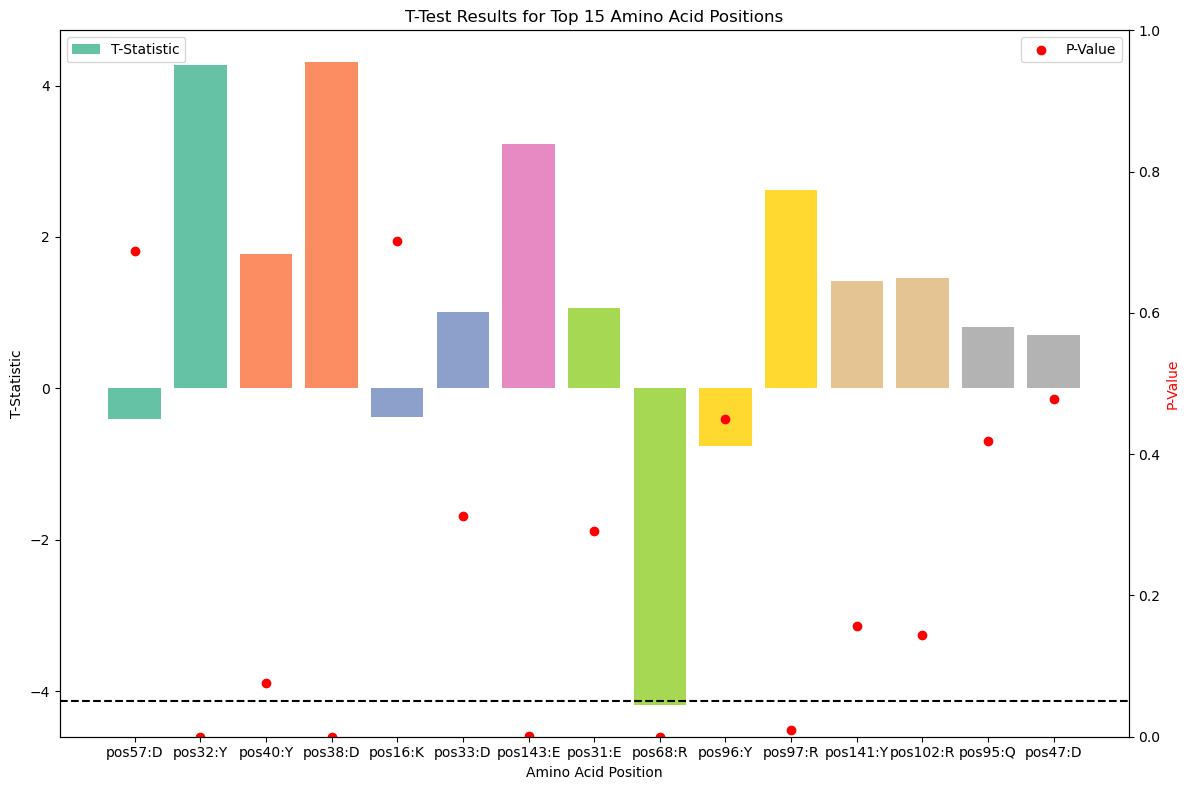

In [28]:
colors = cm.Set2(np.linspace(0, 1, top_n))

fig, ax1 = plt.subplots(figsize=(12,8))

bars = ax1.bar(t_test_results['Amino Acid Position'], t_test_results['T-Statistic'], color=colors, label='T-Statistic')

ax2 = ax1.twinx()
ax2.scatter(t_test_results['Amino Acid Position'], t_test_results['P-Value'], color='red', marker='o', label='P-Value')
ax2.axhline(y=0.05, color='black', linestyle='--')  # significance threshold

ax2.set_ylim(0, 1)

ax1.set_ylabel('T-Statistic')
ax2.set_ylabel('P-Value', color='red')
ax1.set_xlabel('Amino Acid Position')
ax1.set_title(f'T-Test Results for Top {top_n} Amino Acid Positions')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [32]:
bonferroni_corrected_pvalues = multipletests(t_test_results['P-Value'], method='bonferroni')[1]

fdr_corrected_pvalues = multipletests(t_test_results['P-Value'], method='fdr_bh')[1]

t_test_results['Bonferroni Corrected P-Value'] = bonferroni_corrected_pvalues
t_test_results['FDR Corrected P-Value'] = fdr_corrected_pvalues

t_test_results

Amino Acid Position  T-Statistic   P-Value  Bonferroni Corrected P-Value  \
56              pos57:D    -0.403150  0.687065                      1.000000   
31              pos32:Y     4.271116  0.000025                      0.000369   
39              pos40:Y     1.777134  0.076348                      1.000000   
37              pos38:D     4.306457  0.000021                      0.000317   
15              pos16:K    -0.383321  0.701697                      1.000000   
32              pos33:D     1.010831  0.312742                      1.000000   
142            pos143:E     3.223176  0.001378                      0.020664   
30              pos31:E     1.058318  0.290585                      1.000000   
67              pos68:R    -4.179209  0.000036                      0.000545   
95              pos96:Y    -0.756416  0.449869                      1.000000   
96              pos97:R     2.623448  0.009056                      0.135840   
140            pos141:Y     1.419844  0.156475                      1.000000   
101            pos102:R     1.464024  0.144016                      1.000000   
94              pos95:Q     0.810573  0.418120                      1.000000   
46              pos47:D     0.709248  0.478607                      1.000000   

     FDR Corrected P-Value  
56                0.701697  
31                0.000182  
39                0.190870  
37                0.000182  
15                0.701697  
32                0.469113  
142               0.005166  
30                0.469113  
67                0.000182  
95                0.552239  
96                0.027168  
140               0.293391  
101               0.293391  
94                0.552239  
46                0.552239

In [33]:
t_test_results.to_clipboard()

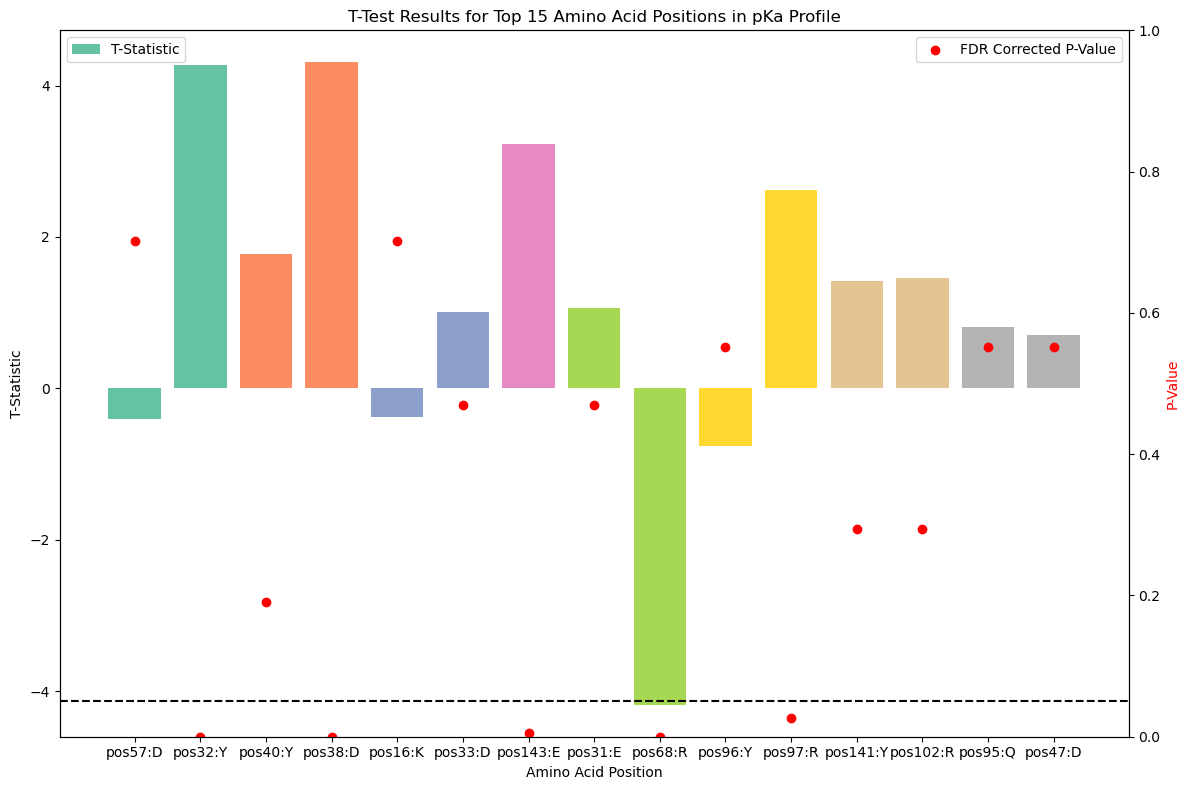

In [31]:
colors = cm.Set2(np.linspace(0, 1, top_n))

fig, ax1 = plt.subplots(figsize=(12, 8))

bars = ax1.bar(t_test_results['Amino Acid Position'], t_test_results['T-Statistic'], color=colors, label='T-Statistic')

ax2 = ax1.twinx()
ax2.scatter(t_test_results['Amino Acid Position'], t_test_results['FDR Corrected P-Value'], color='red', marker='o', label='FDR Corrected P-Value')
ax2.axhline(y=0.05, color='black', linestyle='--')  # significance threshold

ax2.set_ylim(0, 1)

ax1.set_ylabel('T-Statistic')
ax2.set_ylabel('P-Value', color='red')
ax1.set_xlabel('Amino Acid Position')
ax1.set_title(f'T-Test Results for Top {top_n} Amino Acid Positions in pKa Profile')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()